<a href="https://colab.research.google.com/github/Nyandala/Team19_JHB_RegressionPredict_Notebook/blob/master/Team_19_JHB_RegressionNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="top"></a>
# Regression Predict 
### Team_19_JHB_RuPaul'sRegRace <sup>*</sup>
---
<img src="https://github.com/Lizette95/regression-predict-api-template/blob/master/utils/banner.png?raw=true" align="left">  

### Table of Contents
---
1. [Introduction](#intro)
 * Project Description
 * Datasets and Variables
---
2. [Module Imports](#imports)
---
3. [Data Cleaning](#data)
 * Load Data
 * Merge Datasets
 * Missing Data
 * Remove Target Outliers
---
4. [Exploratory Data Analysis](#EDA)
 * Data Summary Statistics
 * Univariate Analysis and Visualisation
 * Bivariate Analysis and Visualisation
 * Map Visualisation
---
5. [Data Preprocessing](#preprocessing) 
 * Feature Engineering
 * Encoding Categorical Data
 * Split Training Set Into Training and Validation Sets
 * Feature Scaling
 * Feature Selection

---
6. [Modelling](#modelling)
 * Linear Regression
 * Multilinear Regression
 * Polynomial Regression
 * Support Vector Regression
 * Decision Tree Regression
 * Random Forest Regression
 * Lasso Regression
 * Ridge Regression
 * XGBoost
---
7. [Performance Evaluation](#evaluation)
---
8. [Model Analysis](#analysis)
---
9. [Conclusion](#conclusion)
---
10. [Save Model and Output](#save)

<a id="intro"></a>
## 1. Introduction  

### Project Description

Machine learning is a powerful branch of Artificial Intelligence, dating as far back as 1952,  developed to teach computer systems how to make decisions emanated from preexisting data. Mathematical algorithms are applied to training data which allows a machine to identify patterns and make predictions for unseen datasets.

Regression is a popular supervised learning statistical method that aims to predict the value of a dependent variable (y) based on an independent variable (x). The relationship between the variables can be linear or nonlinear.

The Zindi challenge, hosted by Sendy in partnership with insight2impact facility, is to build a regression model that will predict an accurate time of arrival for motobike deliveries from the pickup point to the destination of the package. An accurate arrival time will enhance customer communication and customer experience. In addition, the solution will help businesses reduce the cost of trade through better management of resources and planning.


The dataset provided by Sendy includes order details and rider metrics based on orders made on the Sendy platform. The challenge is to predict the estimated time of arrival for orders, from pick-up to drop-off. The training dataset is a subset of over 20,000 orders and only includes direct orders (i.e. Sendy “express” orders) with bikes in Nairobi. 

### Datasets and Variables  

**train_data:** The dataset that will be used to train our model  
**test_data:** The dataset on which we will apply our model to  
**riders:** Contains unique rider IDs, number of orders, age, rating and number of ratings

**Order details**  
* Order No: Unique number identifying the order  
* User Id: Unique number identifying the customer on a platform  
* Vehicle Type: For this competition limited to bikes, however in practice, Sendy service extends to trucks and vans  
* Platform Type: Platform used to place the order (there are 4 types)  
* Personal or Business: Customer type  

**Placement times**  
* Placement: Day of Month (i.e 1-31)  
* Placement: Weekday (Monday = 1)  
* Placement: Time - Time of day the order was placed  

**Confirmation times**  
* Confirmation: Day of Month (i.e 1-31)  
* Confirmation: Weekday (Monday = 1)  
* Confirmation: Time (Time of day the order was confirmed by a rider)  

**Arrival at Pickup times**  
* Arrival at Pickup: Day of Month (i.e 1-31)  
* Arrival at Pickup: Weekday (Monday = 1)  
* Arrival at Pickup: Time (Time of day the rider arrived at the location to pick up the order - as marked by the rider through the Sendy application)  

**Pickup times**  
* Pickup: Day of Month (i.e 1-31)  
* Pickup: Weekday (Monday = 1)  
* Pickup: Time (Time of day the rider picked up the order - as marked by the rider through the Sendy application)  

**Arrival at Destination times** (not in Test set)  
* Arrival at Destination: Day of Month (i.e 1-31)  
* Arrival at Destination: Weekday (Monday = 1)  
* Arrival at Destination: Time (Time of day the rider arrived at the destination to deliver the order - as marked by the rider through the Sendy application)  
* Distance covered (KM): The distance from Pickup to Destination  
* Temperature: Temperature at the time of order placement in Degrees Celsius (measured every three hours)  
* Precipitation in Millimeters: Precipitation at the time of order placement (measured every three hours)  
* Pickup Latitude and Longitude: Latitude and longitude of pick up location  
* Destination Latitude and Longitude: Latitude and longitude of delivery location  
* Rider ID: ID of the Rider who accepted the order  
* Time from Pickup to Arrival: Time in seconds between ‘Pickup’ and ‘Arrival at Destination’ **(Target variable)**    

**Rider metrics**  
* Rider ID: Unique number identifying the rider (same as in order details)  
* No of Orders: Number of Orders the rider has delivered  
* Age: Number of days since the rider delivered the first order  
* Average Rating: Average rating of the rider  
* No of Ratings: Number of ratings the rider has received. Rating an order is optional for the customer

<a id="imports"></a>
## 2. Module Imports

In [0]:
# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

# Prerequisites
#!{sys.executable} -m pip install folium
#!{sys.executable} -m pip install pygeohash
#!{sys.executable} -m pip install xgboost
#!{sys.executable} -m pip install lightgbm

# Import modules
import sys
import folium
import pickle
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import pygeohash as gh
import matplotlib.pyplot as plt
import folium.plugins as plugins
from scipy.stats import pearsonr
from folium.plugins import HeatMap
from IPython.display import display
from scipy.stats import boxcox, zscore
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from math import sqrt

# Display
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")

ModuleNotFoundError: ignored

<a id="data"></a>
## 3. Data Cleaning

### Load Data

In [0]:
train_df = pd.read_csv('https://raw.githubusercontent.com/Lizette95/regression-predict-api-template/master/utils/data/Train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/Lizette95/regression-predict-api-template/master/utils/data/Test.csv')
riders = pd.read_csv('https://raw.githubusercontent.com/Lizette95/regression-predict-api-template/master/utils/data/Riders.csv')

In [0]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [0]:
train_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday,Placement - Time,Confirmation - Day of Month,Confirmation - Weekday,...,Pickup - Day of Month (sin),Pickup - Day of Month (cos),Pickup - Weekday (sin),Pickup - Weekday (cos),Pickup - Time (sin),Pickup - Time (cos),Pickup (geohash),Destination (geohash),Pickup (label),Destination (label)
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,0.968077,-0.250653,-0.974928,-0.222521,0.392738,-0.919650,kzf0w,kzf0w,23,24
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,0.651372,-0.758758,-0.974928,-0.222521,0.069104,-0.997609,kzf0r,kzf0t,18,21
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-0.201299,0.979530,0.974928,-0.222521,-0.229413,-0.973329,kzf0w,kzf0w,23,24
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,0.101168,-0.994869,-0.974928,-0.222521,0.562444,-0.826835,kzf0w,kzf0v,23,23
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,0.485302,-0.874347,0.781831,0.623490,0.479522,-0.877530,kzf0v,kzf0t,22,21


In [0]:
test_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday,Placement - Time,Confirmation - Day of Month,Confirmation - Weekday,...,Pickup - Day of Month (sin),Pickup - Day of Month (cos),Pickup - Weekday (sin),Pickup - Weekday (cos),Pickup - Time (sin),Pickup - Time (cos),Pickup (geohash),Destination (geohash),Pickup (label),Destination (label)
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,-0.724793,0.688967,0.433884,-0.900969,-0.973162,-0.230121,kzf0r,kzf0t,18,21
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,-0.299363,-0.954139,-0.974928,-0.222521,-0.364944,-0.931029,kzf0v,kzf0t,22,21
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,-0.724793,0.688967,-0.433884,-0.900969,0.009163,-0.999958,kzf0t,kzf0w,20,24
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,-0.299363,-0.954139,0.781831,0.623490,-0.562324,-0.826917,kzf0t,kzf0t,20,21
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,0.790776,-0.612106,0.974928,-0.222521,0.017162,-0.999853,kzf0t,kzf0v,20,23


### Merge Datasets

In [0]:
# List columns not present in the test dataset
[name for name in train_data.columns if name not in test_data.columns]

['Arrival at Destination - Day of Month',
 'Arrival at Destination - Weekday',
 'Arrival at Destination - Time',
 'Time from Pickup to Arrival',
 'Placement - Time(bins)']

Our target variable for this project is 'Time from Pickup to Arrival' (in seconds), therefore it is not included in our testing set. All other information about the day/time of arrival is also not included.

In [0]:
# Merge datasets
train_data = pd.merge(train_df,riders,on='Rider Id',how='left')
test_data = pd.merge(test_df,riders,on='Rider Id',how='left')

# Rename columns
train_data.columns = [column.replace("Of","of") for column in train_data.columns]
train_data.columns = [column.replace("_"," ") for column in train_data.columns]
train_data.columns = [column.replace("(Mo = 1)"," ") for column in train_data.columns]
train_data = train_data.rename(columns=lambda x: x.strip())
test_data.columns = [column.replace("Of","of") for column in test_data.columns]
test_data.columns = [column.replace("_"," ") for column in test_data.columns]
test_data.columns = [column.replace("(Mo = 1)"," ") for column in test_data.columns]
test_data = test_data.rename(columns=lambda x: x.strip())

In [0]:
train_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday,Placement - Time,Confirmation - Day of Month,Confirmation - Weekday,...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No of Orders,Age,Average Rating,No of Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [0]:
test_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday,Placement - Time,Confirmation - Day of Month,Confirmation - Weekday,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No of Orders,Age,Average Rating,No of Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010


### Missing Data

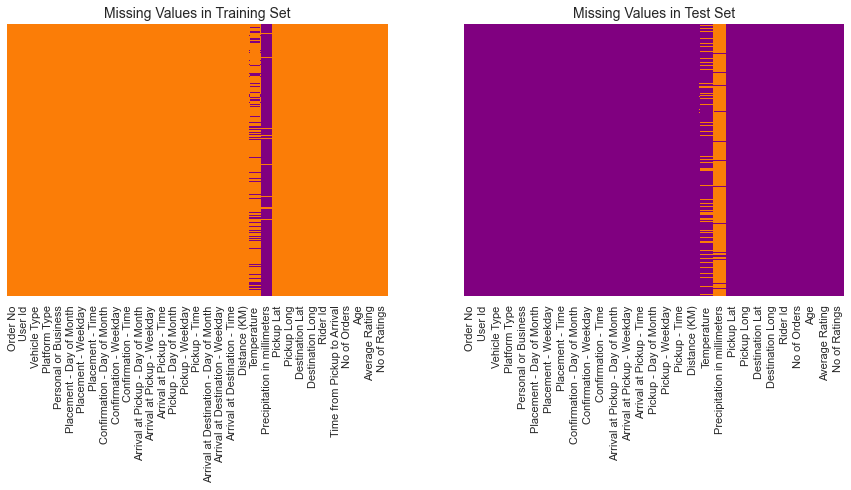

,% missing training set,% missing testing set
Precipitation in millimeters,97.40,97.18
Temperature,20.59,20.33


In [0]:
# Check columns for missing values
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))

#Training set
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap=['#fb7d07','purple'],ax=axis[0])
axis[0].set_title('Missing Values in Training Set',fontsize=14)
#Testing set
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap=['purple','#fb7d07'],ax=axis[1])
axis[1].set_title('Missing Values in Test Set',fontsize=14)

plt.show()

# Calculate percentage missing values
train = round((train_data.isnull().sum()/train_data.isnull().count())*100,2)
test = round((test_data.isnull().sum()/test_data.isnull().count())*100,2)
d = {'% missing training set': train, '% missing testing set': test}
pd.DataFrame(data=d).sort_values(by='% missing training set',ascending=False).head(2)

**Dealing with missing data:**
* We can remove the 'Precipitation in millimeters' column from both datasets, as 97% of the data is missing.
* We can impute missing values in the 'Temperature' column with the average temperature at the time (hour) the order was placed, as only 20% of the data is missing. We use this information from the training set to impute missing values in the testing set.

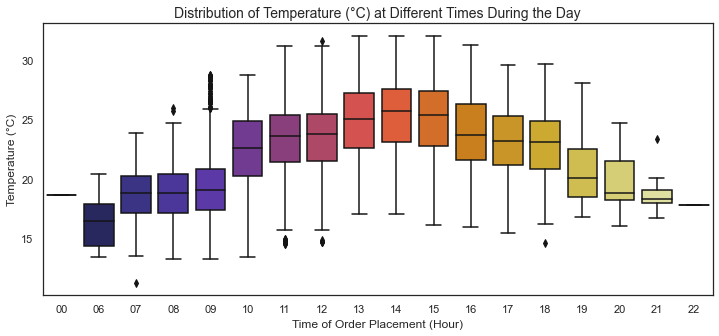

In [0]:
# Drop 'Precipitation in millimeters' column
train_data.drop('Precipitation in millimeters',axis=1,inplace=True)
test_data.drop('Precipitation in millimeters',axis=1,inplace=True)

# Create 24h time bins for when orders were placed
train_data['Placement - Time(bins)'] = pd.to_datetime(pd.to_datetime(train_data['Placement - Time']).dt.strftime('%H:%M:%S')).dt.strftime('%H')

fig,axis = plt.subplots(figsize=(12,5))
sns.boxplot(x='Placement - Time(bins)',y='Temperature',data=train_data,palette='CMRmap')
plt.title('Distribution of Temperature (°C) at Different Times During the Day',fontsize=14)
plt.xlabel('Time of Order Placement (Hour)')
plt.ylabel('Temperature (°C)')
plt.show()

# Impute temperature for missing values
train_data['Temperature'] = train_data['Temperature'].fillna(round(train_data.groupby('Placement - Time(bins)')['Temperature'].transform('mean'),1))
test_data['Temperature'] = test_data['Temperature'].fillna(round(train_data.groupby('Placement - Time(bins)')['Temperature'].transform('mean'),1))

### Remove Target Outliers

In Kenya, the [maximum travelling speed](https://www.rhinocarhire.com/Drive-Smart-Blog/Drive-Smart-Kenya.aspx) allowed on roads outside of towns and cities is 110km/h. We allow a margin of error of +10km/h to remove unrealistic outliers, based on the minimum travel time per kilometer:  

$Time = \frac{Distance}{Speed} =  \frac{1km}{120km/h} = 30 {seconds/km} $

From the above calculation, we can exclude outliers from the target variable based on the distance travelled in kilometers:

When Distance = 1 km (Exclude data if Time from Pickup to Arrival < 30 seconds)
<br>
When Distance = 2 km (Exclude data if Time from Pickup to Arrival < 60 seconds)
<br>
When Distance = 3 km (Exclude data if Time from Pickup to Arrival < 90 seconds)
<br>
...  
etc.

In [0]:
#Identify outliers in target variable
train_data['Outlier'] = (train_data['Distance (KM)']*30) > train_data['Time from Pickup to Arrival']
print("There are " + str(len(train_data[train_data['Outlier']==True])) + " outliers in our target variable.")

There are 876 outliers in our target variable.


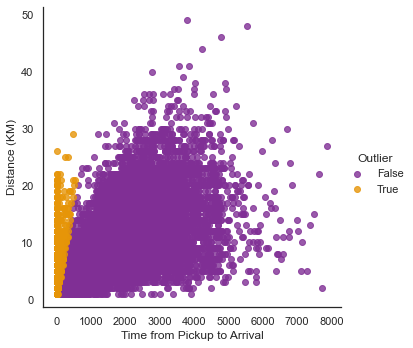

In [0]:
ax = sns.lmplot(x='Time from Pickup to Arrival', y='Distance (KM)', data=train_data, hue='Outlier', palette='CMRmap', fit_reg=False)
plt.xlabel('Time from Pickup to Arrival')
plt.ylabel('Distance (KM)')
plt.setp(ax._legend.get_title(), fontsize=12)
plt.show()

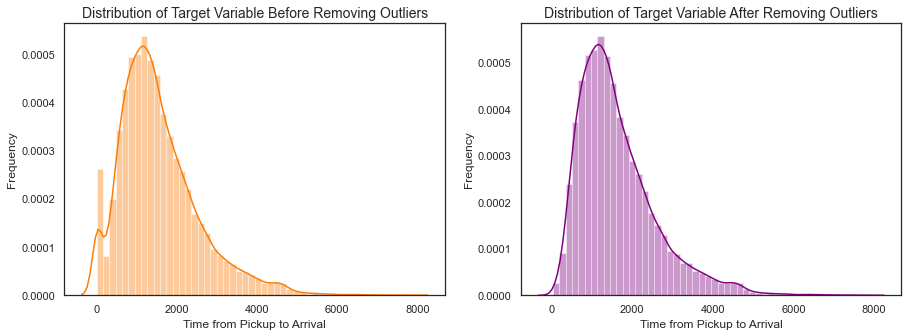

In [0]:
# Remove outliers
new_train_data = train_data[train_data['Outlier'] == False]
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))

# Before removing outliers
sns.distplot(train_data['Time from Pickup to Arrival'],ax=axis[0],color='#fb7d07')
axis[0].set_title('Distribution of Target Variable Before Removing Outliers',fontsize=14)
axis[0].set_xlabel('Time from Pickup to Arrival')
axis[0].set_ylabel('Frequency')
# After removing outliers
sns.distplot(new_train_data['Time from Pickup to Arrival'],ax=axis[1],color='purple')
axis[1].set_title('Distribution of Target Variable After Removing Outliers',fontsize=14)
axis[1].set_xlabel('Time from Pickup to Arrival')
axis[1].set_ylabel('Frequency')

plt.show()

# Remove outlier column
train_data = train_data[train_data['Outlier'] == False]
train_data = train_data.drop(['Outlier'],axis=1)

<a id="EDA"></a>
## 4. Exploratory Data Analysis

### Data Summary Statistics

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20325 entries, 0 to 21200
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Order No                               20325 non-null  object 
 1   User Id                                20325 non-null  object 
 2   Vehicle Type                           20325 non-null  object 
 3   Platform Type                          20325 non-null  int64  
 4   Personal or Business                   20325 non-null  object 
 5   Placement - Day of Month               20325 non-null  int64  
 6   Placement - Weekday                    20325 non-null  int64  
 7   Placement - Time                       20325 non-null  object 
 8   Confirmation - Day of Month            20325 non-null  int64  
 9   Confirmation - Weekday                 20325 non-null  int64  
 10  Confirmation - Time                    20325 non-null  object 
 11  Ar

In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 7067
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Order No                          7068 non-null   object 
 1   User Id                           7068 non-null   object 
 2   Vehicle Type                      7068 non-null   object 
 3   Platform Type                     7068 non-null   int64  
 4   Personal or Business              7068 non-null   object 
 5   Placement - Day of Month          7068 non-null   int64  
 6   Placement - Weekday               7068 non-null   int64  
 7   Placement - Time                  7068 non-null   object 
 8   Confirmation - Day of Month       7068 non-null   int64  
 9   Confirmation - Weekday            7068 non-null   int64  
 10  Confirmation - Time               7068 non-null   object 
 11  Arrival at Pickup - Day of Month  7068 non-null   int64  
 12  Arriva

In [0]:
train_data.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday,Confirmation - Day of Month,Confirmation - Weekday,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday,Pickup - Day of Month,Pickup - Weekday,Arrival at Destination - Day of Month,...,Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No of Orders,Age,Average Rating,No of Ratings
count,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,...,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000
mean,2.743469,15.645166,3.241328,15.645314,3.241476,15.645314,3.241476,15.645314,3.241476,15.645314,...,23.212905,-1.281244,36.811072,-1.282611,36.811317,1622.426863,1644.402952,973.002214,13.893009,340.341205
std,0.634275,8.792534,1.568850,8.792503,1.568781,8.792503,1.568781,8.792503,1.568781,8.792503,...,3.358326,0.030601,0.037749,0.035076,0.045017,955.300283,1504.827591,636.908788,0.907283,403.908905
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,11.200000,-1.438302,36.653621,-1.430298,36.606594,34.000000,2.000000,96.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,...,20.800000,-1.300921,36.783473,-1.301446,36.785618,939.000000,557.000000,495.000000,13.700000,60.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,...,23.500000,-1.279395,36.806509,-1.284575,36.808002,1412.000000,1209.000000,872.000000,14.000000,158.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,...,25.400000,-1.257147,36.828477,-1.261007,36.829263,2077.000000,2273.000000,1218.000000,14.300000,504.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,...,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,9756.000000,3764.000000,15.200000,2298.000000


In [0]:
test_data.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday,Confirmation - Day of Month,Confirmation - Weekday,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday,Pickup - Day of Month,Pickup - Weekday,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No of Orders,Age,Average Rating,No of Ratings
count,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000
mean,2.752122,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,9.458970,23.221350,-1.282043,36.811148,-1.282255,36.811326,1717.032258,998.400113,13.883178,342.815789
std,0.624000,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,5.575689,3.346105,0.030044,0.037962,0.034236,0.043507,1628.842795,672.195000,0.846333,410.064334
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.200000,-1.433512,36.653828,-1.422652,36.639195,3.000000,99.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.800000,-1.301201,36.784605,-1.300921,36.786546,534.000000,494.000000,13.600000,60.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.400000,-1.281301,36.807219,-1.283219,36.807927,1209.000000,872.000000,14.000000,157.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.400000,-1.257274,36.829716,-1.261256,36.828195,2311.000000,1239.000000,14.300000,491.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,47.000000,32.100000,-1.148352,36.991046,-1.030225,37.018958,9756.000000,3764.000000,15.200000,2298.000000


### Univariate Analysis and Visualisation

In this section we will describe and visualise data that involves a single variable:  
* Number of Orders Per Platform Type
* Number of Orders Per Customer Type
* Number of Orders and Deliveries Per Day of the Month
* Number of Orders and Deliveries Per Day of the Week
* Distribution of Orders and Deliveries Per Hour of the Day
* Distribution of Distance from Pickup to Destination

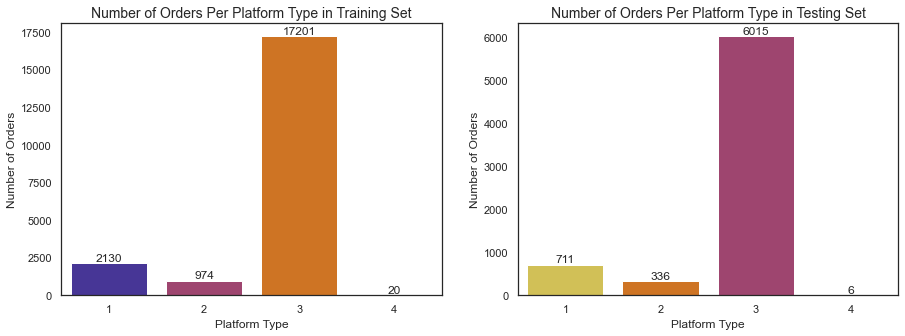

In [0]:
# Number of Orders Per Platform Type
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))

# Training set
ax1_PT = sns.countplot(x='Platform Type',data=train_data,palette='CMRmap',ax=axis[0])
axis[0].set_title('Number of Orders Per Platform Type in Training Set',fontsize=14)
axis[0].set_xlabel('Platform Type')
axis[0].set_ylabel('Number of Orders')
for p in ax1_PT.patches:
    ax1_PT.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')
# Testing set
ax2_PT = sns.countplot(x='Platform Type',data=test_data,palette='CMRmap_r',ax=axis[1])
axis[1].set_title('Number of Orders Per Platform Type in Testing Set',fontsize=14)
axis[1].set_xlabel('Platform Type')
axis[1].set_ylabel('Number of Orders')
for p in ax2_PT.patches:
    ax2_PT.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')

plt.show()

Orders are concentrated on Platform 3 in both the Training set and Testing set, making up approximately 85% of orders in both datasets.

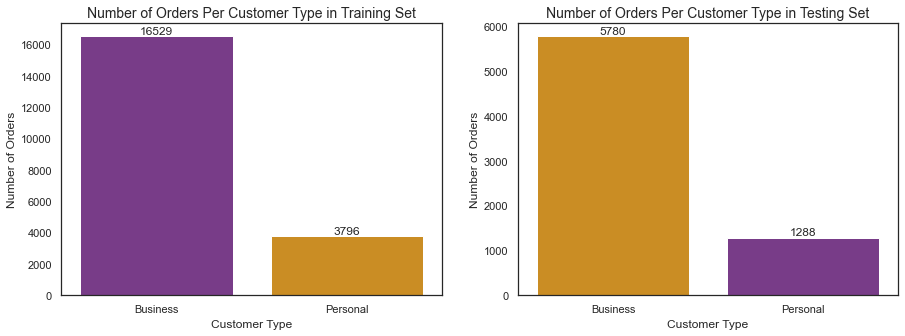

In [0]:
# Number of Orders Per Customer Type
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))

# Training set
ax1_CT = sns.countplot(x='Personal or Business',data=train_data,palette='CMRmap',ax=axis[0])
axis[0].set_title('Number of Orders Per Customer Type in Training Set',fontsize=14)
axis[0].set_xlabel('Customer Type')
axis[0].set_ylabel('Number of Orders')
for p in ax1_CT.patches:
    ax1_CT.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')
# Testing set
ax2_CT = sns.countplot(x='Personal or Business',data=test_data,palette='CMRmap_r',ax=axis[1])
axis[1].set_title('Number of Orders Per Customer Type in Testing Set',fontsize=14)
axis[1].set_xlabel('Customer Type')
axis[1].set_ylabel('Number of Orders')
for p in ax2_CT.patches:
    ax2_CT.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')

plt.show()

Orders are made most by Business customers, 81.32% in the Training set and 81.78% in the Testing set.

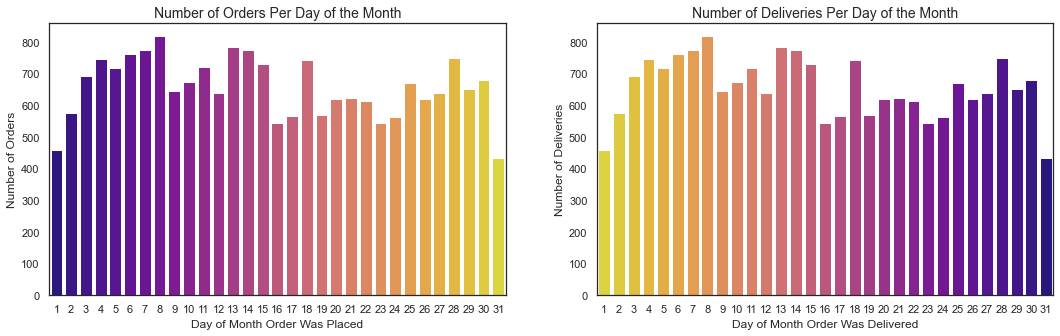

In [0]:
# Number of Orders and Deliveries Per Day of the Month
fig,axis = plt.subplots(ncols=2, figsize=(18, 5))

# Orders
sns.countplot(x='Placement - Day of Month',data=train_data,palette='plasma',ax=axis[0])
axis[0].set_title('Number of Orders Per Day of the Month',fontsize=14)
axis[0].set_xlabel('Day of Month Order Was Placed')
axis[0].set_ylabel('Number of Orders')
# Deliveries
sns.countplot(x='Arrival at Destination - Day of Month',data=train_data,palette='plasma_r',ax=axis[1])
axis[1].set_title('Number of Deliveries Per Day of the Month',fontsize=14)
axis[1].set_xlabel('Day of Month Order Was Delivered')
axis[1].set_ylabel('Number of Deliveries')

plt.show()

'Day of Month' is a cyclical feature and can be converted to a more appropriate format during feature engineering, prior to building our regression model.

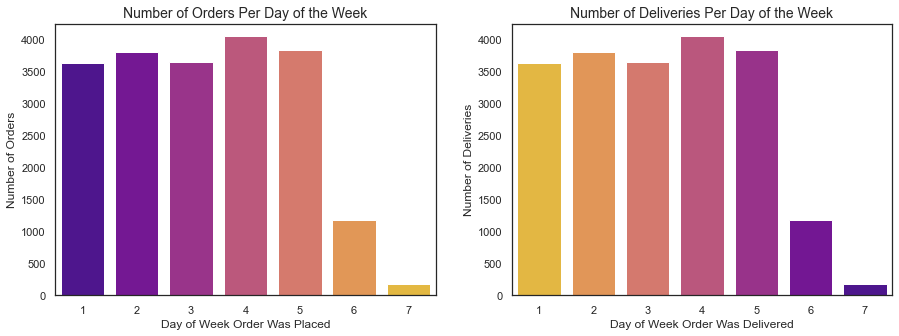

In [0]:
# Number of Orders and Deliveries Per Day of the Week
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))

# Orders
sns.countplot(x='Placement - Weekday',data=train_data,palette='plasma',ax=axis[0])
axis[0].set_title('Number of Orders Per Day of the Week',fontsize=14)
axis[0].set_xlabel('Day of Week Order Was Placed')
axis[0].set_ylabel('Number of Orders')
# Deliveries
sns.countplot(x='Arrival at Destination - Weekday',data=train_data,palette='plasma_r',ax=axis[1])
axis[1].set_title('Number of Deliveries Per Day of the Week',fontsize=14)
axis[1].set_xlabel('Day of Week Order Was Delivered')
axis[1].set_ylabel('Number of Deliveries')

plt.show()

'Weekday' is a cyclical feature and can be converted to a more appropriate format during feature engineering, prior to building our regression model.

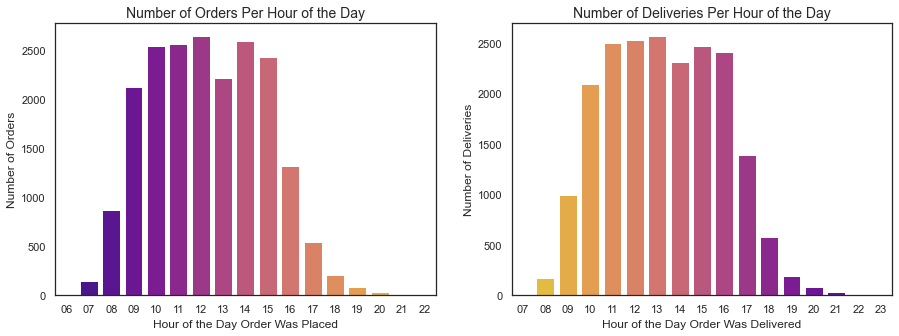

In [0]:
# Distribution of Orders and Deliveries Per Hour of the Day
orders = pd.to_datetime(pd.to_datetime(train_data['Placement - Time']).dt.strftime('%H:%M:%S')).dt.strftime('%H')
deliveries = pd.to_datetime(pd.to_datetime(train_data['Arrival at Destination - Time']).dt.strftime('%H:%M:%S')).dt.strftime('%H')
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))

# Orders
sns.countplot(x=orders,palette='plasma',ax=axis[0])
axis[0].set_title('Number of Orders Per Hour of the Day',fontsize=14)
axis[0].set_xlabel('Hour of the Day Order Was Placed')
axis[0].set_ylabel('Number of Orders')
# Deliveries
sns.countplot(x=deliveries,palette='plasma_r',ax=axis[1])
axis[1].set_title('Number of Deliveries Per Hour of the Day',fontsize=14)
axis[1].set_xlabel('Hour of the Day Order Was Delivered')
axis[1].set_ylabel('Number of Deliveries')

plt.show()

'Hour of the Day' is a cyclical feature and can be converted to a more appropriate format during feature engineering, prior to building our regression model.

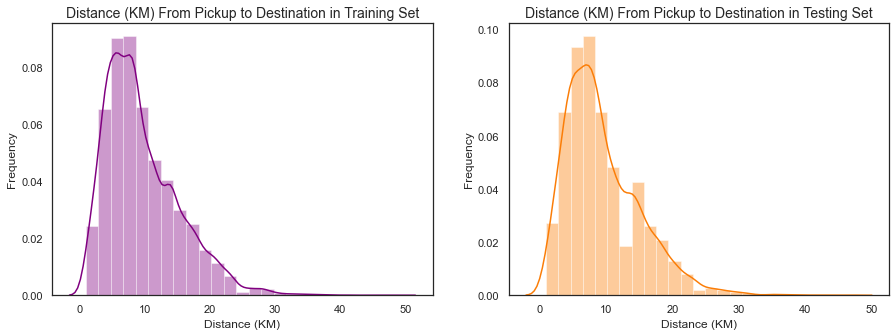

In [0]:
# Distribution of Distance from Pickup to Destination
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))

# Training set
sns.distplot(train_data['Distance (KM)'],bins=25,color='purple',ax=axis[0])
axis[0].set_title('Distance (KM) From Pickup to Destination in Training Set',fontsize=14)
axis[0].set_xlabel('Distance (KM)')
axis[0].set_ylabel('Frequency')
# Testing set
sns.distplot(test_data['Distance (KM)'],bins=25,color='#fb7d07',ax=axis[1])
axis[1].set_title('Distance (KM) From Pickup to Destination in Testing Set',fontsize=14)
axis[1].set_xlabel('Distance (KM)')
axis[1].set_ylabel('Frequency')

plt.show()

Most rides made from pickup to destination are under 20km for both Training set and Testing set.

### Bivariate Analysis and Visualisation

In this section we will describe and visualise data that involves two variables:
* Time from Pickup to Arrival Per Platform Type
* Time from Pickup to Arrival Per Customer Type
* Time from Pickup to Arrival Per Day of the Month
* Time from Pickup to Arrival Per Day of the Week
* Time from Pickup to Arrival Per Hour of the Day
* Travel Distance Per Platform Type
* Travel Distance Per Customer Type
* Travel Distance Per Day of the Month
* Travel Distance Per Day of the Week
* Travel Distance Per Hour of the Day

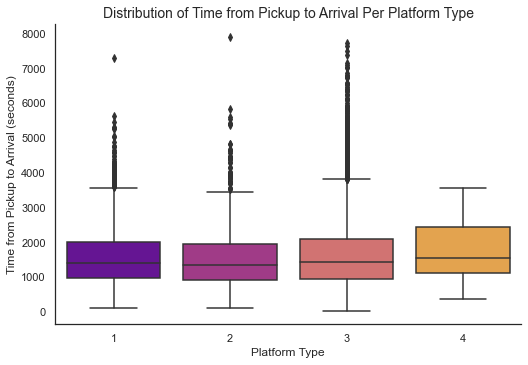

In [0]:
# Time from Pickup to Arrival Per Platform Type
sns.catplot(x='Platform Type', y='Time from Pickup to Arrival',data=train_data.sort_values('Platform Type'),kind='box',height=5,aspect=1.5,palette='plasma')
plt.title('Distribution of Time from Pickup to Arrival Per Platform Type',fontsize=14)
plt.xlabel('Platform Type')
plt.ylabel('Time from Pickup to Arrival (seconds)')
plt.show()

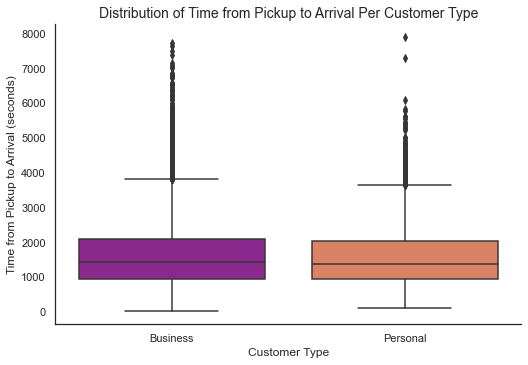

In [0]:
# Time from Pickup to Arrival Per Customer Type
sns.catplot(x='Personal or Business', y='Time from Pickup to Arrival',data=train_data.sort_values('Personal or Business'),kind='box',height=5,aspect=1.5,palette='plasma')
plt.title('Distribution of Time from Pickup to Arrival Per Customer Type',fontsize=14)
plt.xlabel('Customer Type')
plt.ylabel('Time from Pickup to Arrival (seconds)')
plt.show()

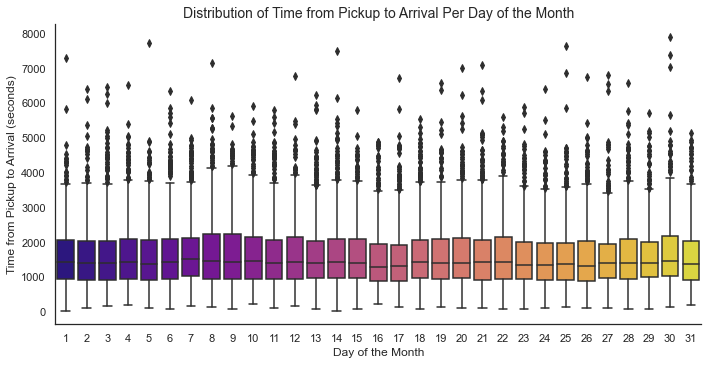

In [0]:
# Time from Pickup to Arrival Per Day of the Month
sns.catplot(x='Arrival at Destination - Day of Month', y='Time from Pickup to Arrival',data=train_data.sort_values('Arrival at Destination - Day of Month'),kind='box',height=5,aspect=2,palette='plasma')
plt.title('Distribution of Time from Pickup to Arrival Per Day of the Month',fontsize=14)
plt.xlabel('Day of the Month')
plt.ylabel('Time from Pickup to Arrival (seconds)')
plt.show()

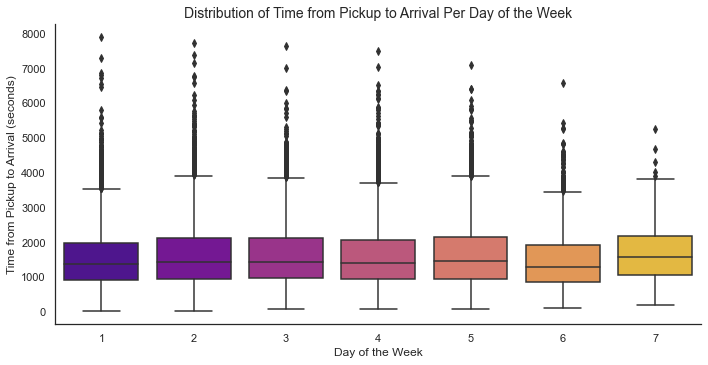

In [0]:
# Time from Pickup to Arrival Per Day of the Week
sns.catplot(x='Arrival at Destination - Weekday', y='Time from Pickup to Arrival',data=train_data.sort_values('Arrival at Destination - Weekday'),kind='box',height=5,aspect=2,palette='plasma')
plt.title('Distribution of Time from Pickup to Arrival Per Day of the Week',fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Time from Pickup to Arrival (seconds)')
plt.show()

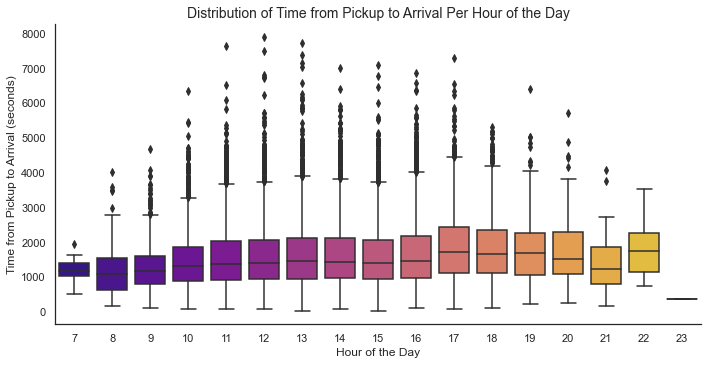

In [0]:
# Time from Pickup to Arrival Per Hour of the Day
order = train_data.sort_values('Arrival at Destination - Time')
order['time'] = pd.to_datetime(pd.to_datetime(train_data['Arrival at Destination - Time']).dt.strftime('%H:%M:%S')).dt.strftime('%H').astype(int)
sns.catplot(x='time', y='Time from Pickup to Arrival',data=order,kind='box',height=5,aspect=2,palette='plasma')
plt.title('Distribution of Time from Pickup to Arrival Per Hour of the Day',fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Time from Pickup to Arrival (seconds)')
plt.show()

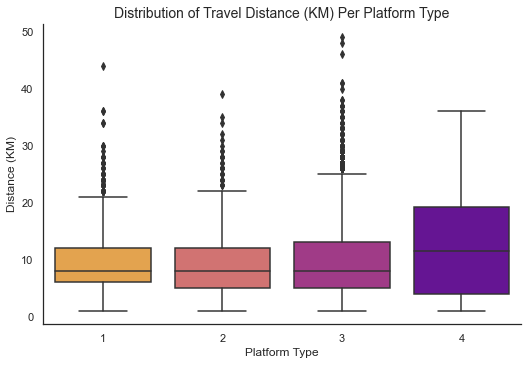

In [0]:
# Travel Distance Per Platform Type
sns.catplot(x='Platform Type', y='Distance (KM)',data=train_data.sort_values('Platform Type'),kind='box',height=5,aspect=1.5,palette='plasma_r')
plt.title('Distribution of Travel Distance (KM) Per Platform Type',fontsize=14)
plt.xlabel('Platform Type')
plt.ylabel('Distance (KM)')
plt.show()

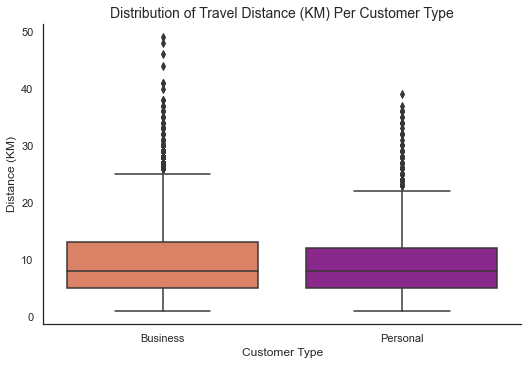

In [0]:
# Travel Distance Per Customer Type
sns.catplot(x='Personal or Business', y='Distance (KM)',data=train_data.sort_values('Personal or Business'),kind='box',height=5,aspect=1.5,palette='plasma_r')
plt.title('Distribution of Travel Distance (KM) Per Customer Type',fontsize=14)
plt.xlabel('Customer Type')
plt.ylabel('Distance (KM)')
plt.show()

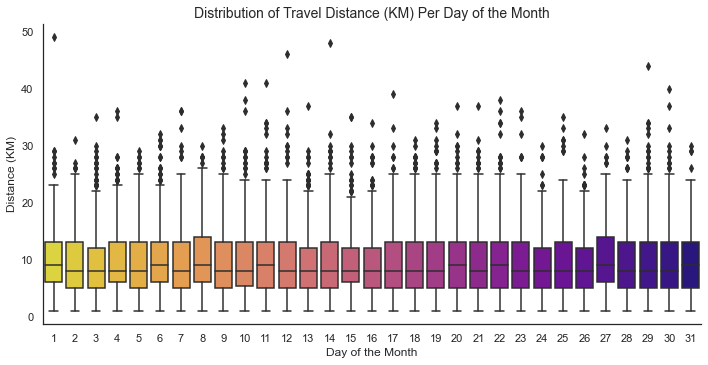

In [0]:
# Travel Distance Per Day of the Month
sns.catplot(x='Arrival at Destination - Day of Month', y='Distance (KM)',data=train_data.sort_values('Arrival at Destination - Day of Month'),kind='box',height=5,aspect=2,palette='plasma_r')
plt.title('Distribution of Travel Distance (KM) Per Day of the Month',fontsize=14)
plt.xlabel('Day of the Month')
plt.ylabel('Distance (KM)')
plt.show()

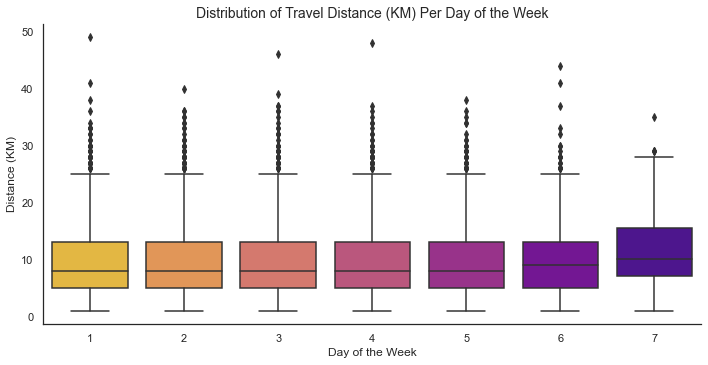

In [0]:
# Travel Distance Per Day of the Week
sns.catplot(x='Arrival at Destination - Weekday', y='Distance (KM)',data=train_data.sort_values('Arrival at Destination - Weekday'),kind='box',height=5,aspect=2,palette='plasma_r')
plt.title('Distribution of Travel Distance (KM) Per Day of the Week',fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Distance (KM)')
plt.show()

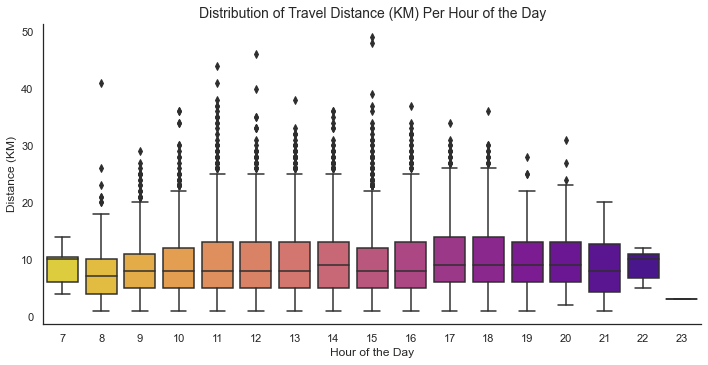

In [0]:
# Travel Distance Per Hour of the Day
sns.catplot(x='time', y='Distance (KM)',data=order,kind='box',height=5,aspect=2,palette='plasma_r')
plt.title('Distribution of Travel Distance (KM) Per Hour of the Day',fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Distance (KM)')
plt.show()

### Map Visualisation

In [0]:
# # Show heatmap of pickup locations
# hmap = folium.Map([-1.286389, 36.817223], zoom_start=12, scrollWheelZoom=False)
# for index, row in train_data.iterrows():
#     folium.CircleMarker([row['Pickup Lat'], row['Pickup Long']],radius=0.5,fill_color="#3db7e4",).add_to(hmap)
# coordinates = train_data[['Pickup Lat', 'Pickup Long']]
# hmap.add_children(plugins.HeatMap(coordinates, radius=20))
# display(hmap)

In [0]:
# # Show heatmap of destinations
# hmap = folium.Map([-1.286389, 36.817223], zoom_start=12, scrollWheelZoom=False)
# for index, row in train_data.iterrows():
#     folium.CircleMarker([row['Destination Lat'], row['Destination Long']],radius=0.5,fill_color="#3db7e4",).add_to(hmap)
# coordinates = train_data[['Destination Lat', 'Destination Long']]
# hmap.add_children(plugins.HeatMap(coordinates, radius=20))
# display(hmap)

<a id="preprocessing"></a>
## 5. Data Preprocessing

### Feature Engineering

In [0]:
# Calculate delivery rate for riders 
train_data['Delivery Rate'] = train_data['No of Orders']/train_data['Age']
test_data['Delivery Rate'] = test_data['No of Orders']/test_data['Age']

# Calculate scaled rating for riders
train_data['Scaled Rating'] = train_data['Average Rating']*(train_data['No of Ratings']/train_data['No of Ratings'].sum())
test_data['Scaled Rating'] = test_data['Average Rating']*(test_data['No of Ratings']/test_data['No of Ratings'].sum())

Encoding cyclical features:  
https://medium.com/ai%C2%B3-theory-practice-business/top-6-errors-novice-machine-learning-engineers-make-e82273d394db  
http://blog.davidkaleko.com/feature-engineering-cyclical-features.html  
https://www.kaggle.com/avanwyk/encoding-cyclical-features-for-deep-learning  
https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/  

In [0]:
# Convert pickup day of month feature to cyclical format
train_data['Pickup - Day of Month (sin)'] = np.sin((train_data['Pickup - Day of Month'])*(2.*np.pi/31))
train_data['Pickup - Day of Month (cos)'] = np.cos((train_data['Pickup - Day of Month'])*(2.*np.pi/31))
test_data['Pickup - Day of Month (sin)'] = np.sin((test_data['Pickup - Day of Month'])*(2.*np.pi/31))
test_data['Pickup - Day of Month (cos)'] = np.cos((test_data['Pickup - Day of Month'])*(2.*np.pi/31))

# Convert pickup weekday feature to cyclical format
train_data['Pickup - Weekday (sin)'] = np.sin(train_data['Pickup - Weekday']*(2.*np.pi/7))
train_data['Pickup - Weekday (cos)'] = np.cos(train_data['Pickup - Weekday']*(2.*np.pi/7))
test_data['Pickup - Weekday (sin)'] = np.sin(test_data['Pickup - Weekday']*(2.*np.pi/7))
test_data['Pickup - Weekday (cos)'] = np.cos(test_data['Pickup - Weekday']*(2.*np.pi/7))

# Function to calculate time in seconds (from midnight)
def time_in_seconds(df,column):
    df[column] = pd.to_datetime(df[column])
    return (df[column] - pd.to_datetime(pd.to_datetime('today').date())).astype('timedelta64[s]')

# Convert pickup time feature to cyclical format
train_data['Pickup - Time'] = time_in_seconds(train_data,'Pickup - Time')
test_data['Pickup - Time'] = time_in_seconds(test_data,'Pickup - Time')
train_data['Pickup - Time (sin)'] = np.sin(train_data['Pickup - Time']*(2.*np.pi/86400))
train_data['Pickup - Time (cos)'] = np.cos(train_data['Pickup - Time']*(2.*np.pi/86400))
test_data['Pickup - Time (sin)'] = np.sin(test_data['Pickup - Time']*(2.*np.pi/86400))
test_data['Pickup - Time (cos)'] = np.cos(test_data['Pickup - Time']*(2.*np.pi/86400))

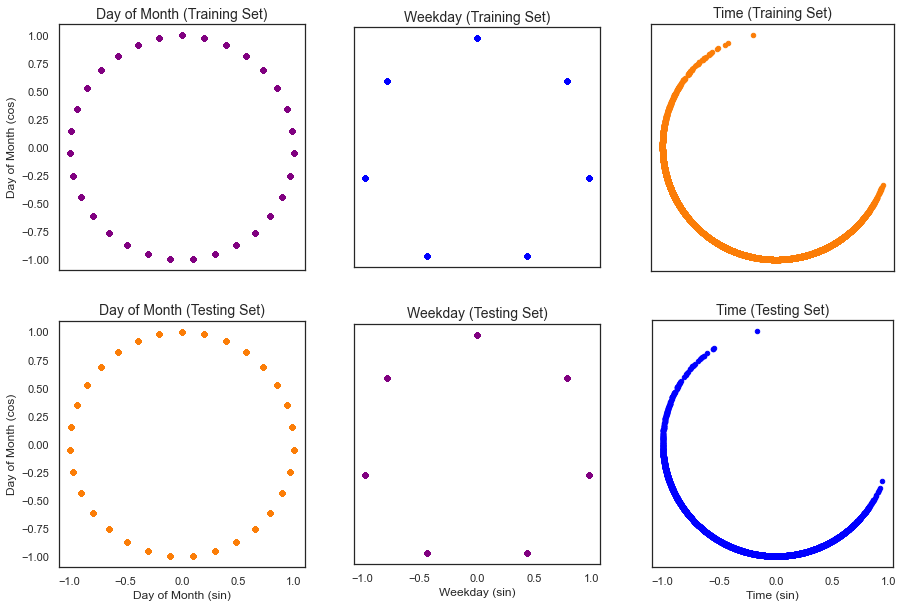

In [0]:
# Cyclical features
fig,((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))

# Training set
# Day of month
train_data.plot.scatter('Pickup - Day of Month (sin)','Pickup - Day of Month (cos)',ax=ax1,color='purple').set_aspect('equal')
ax1.set_title('Day of Month (Training Set)',fontsize=14)
ax1.set_xlabel('Day of Month (sin)')
ax1.set_ylabel('Day of Month (cos)')
# Weekday
train_data.plot.scatter('Pickup - Weekday (sin)','Pickup - Weekday (cos)',ax=ax2,color='blue').set_aspect('equal')
ax2.set_title('Weekday (Training Set)',fontsize=14)
ax2.set_xlabel('Weekday (sin)')
ax2.set_ylabel('Weekday (cos)')
# Time
train_data.plot.scatter('Pickup - Time (sin)','Pickup - Time (cos)',ax=ax3,color='#fb7d07').set_aspect('equal')
ax3.set_title('Time (Training Set)',fontsize=14)
ax3.set_xlabel('Time (sin)')
ax3.set_ylabel('Time (cos)')

# Testing set
# Day of month
test_data.plot.scatter('Pickup - Day of Month (sin)','Pickup - Day of Month (cos)',ax=ax4,color='#fb7d07').set_aspect('equal')
ax4.set_title('Day of Month (Testing Set)',fontsize=14)
ax4.set_xlabel('Day of Month (sin)')
ax4.set_ylabel('Day of Month (cos)')
# Weekday
test_data.plot.scatter('Pickup - Weekday (sin)','Pickup - Weekday (cos)',ax=ax5,color='purple').set_aspect('equal')
ax5.set_title('Weekday (Testing Set)',fontsize=14)
ax5.set_xlabel('Weekday (sin)')
ax5.set_ylabel('Weekday (cos)')
# Time
test_data.plot.scatter('Pickup - Time (sin)','Pickup - Time (cos)',ax=ax6,color='blue').set_aspect('equal')
ax6.set_title('Time (Testing Set)',fontsize=14)
ax6.set_xlabel('Time (sin)')
ax6.set_ylabel('Time (cos)')

for ax in fig.get_axes():
    ax.label_outer()
    
plt.show()

In [0]:
# Convert coordinates to geohash encoding
train_data['Pickup (geohash)'] = train_data.apply(lambda x: gh.encode(x['Pickup Lat'], x['Pickup Long'], precision=5), axis=1)
train_data['Destination (geohash)'] = train_data.apply(lambda x: gh.encode(x['Destination Lat'], x['Destination Long'], precision=5), axis=1)
test_data['Pickup (geohash)'] = test_data.apply(lambda x: gh.encode(x['Pickup Lat'], x['Pickup Long'], precision=5), axis=1)
test_data['Destination (geohash)'] = test_data.apply(lambda x: gh.encode(x['Destination Lat'], x['Destination Long'], precision=5), axis=1)

# Encode geohash labels in training set
encoder_dict = collections.defaultdict(LabelEncoder)
labeled_df = train_data[['Pickup (geohash)','Destination (geohash)']].apply(lambda x: encoder_dict[x.name].fit_transform(x))
train_data['Pickup (label)'] = labeled_df['Pickup (geohash)']
train_data['Destination (label)'] = labeled_df['Destination (geohash)']

# Create label dictionaries from training set
train_data[['Pickup (label)','Destination (label)']] += 1
pickup_labels = pd.Series(train_data['Pickup (label)'].values,index=train_data['Pickup (geohash)']).to_dict()
destination_labels = pd.Series(train_data['Destination (label)'].values,index=train_data['Destination (geohash)']).to_dict()

# Encode geohash labels in testing set
test_data['Pickup (label)'] = test_data['Pickup (geohash)'].apply(lambda i: pickup_labels[i] if i in pickup_labels.keys() else 0)
test_data['Destination (label)'] = test_data['Destination (geohash)'].apply(lambda i: destination_labels[i] if i in destination_labels.keys() else 0)

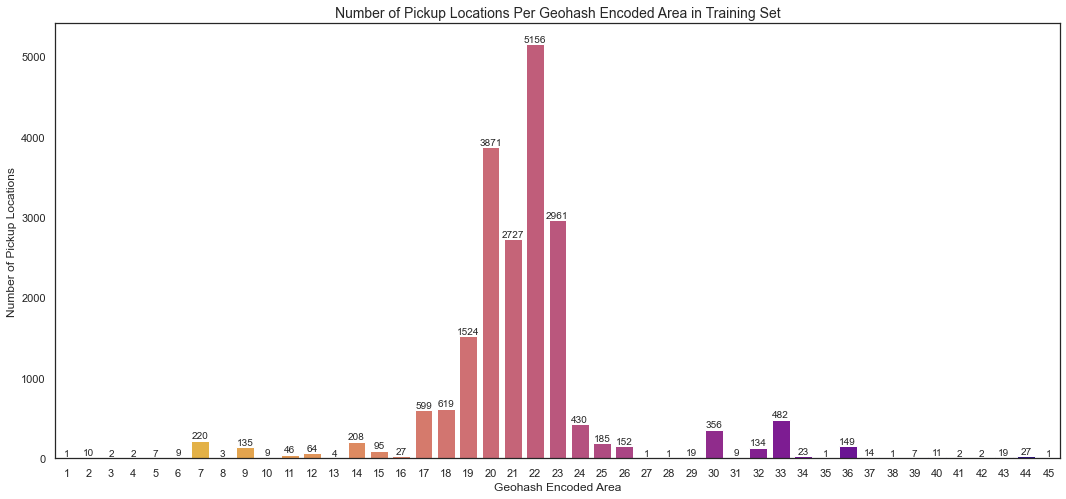

In [0]:
# Number of Pickup Locations Per Geohash Encoded Area in Training Set
fig,axis = plt.subplots(figsize=(18, 8))
ax_geoP = sns.countplot(x='Pickup (label)',data=train_data,palette='plasma_r')
plt.title('Number of Pickup Locations Per Geohash Encoded Area in Training Set',fontsize=14)
plt.xlabel('Geohash Encoded Area')
plt.ylabel('Number of Pickup Locations')
for p in ax_geoP.patches:
    ax_geoP.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=10, ha='center', va='bottom')
plt.show()

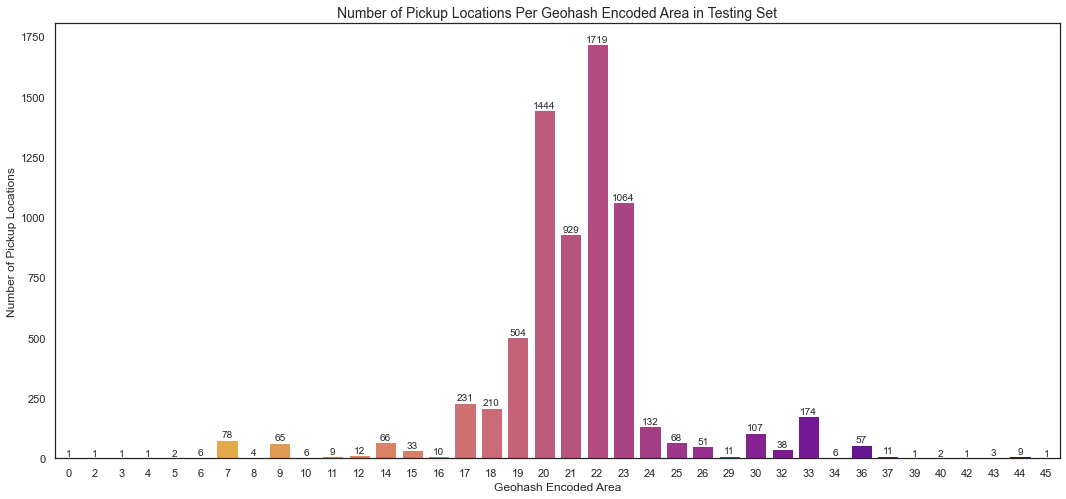

In [0]:
# Number of Pickup Locations Per Geohash Encoded Area in Testing Set
fig,axis = plt.subplots(figsize=(18, 8))
ax_geoP = sns.countplot(x='Pickup (label)',data=test_data,palette='plasma_r')
plt.title('Number of Pickup Locations Per Geohash Encoded Area in Testing Set',fontsize=14)
plt.xlabel('Geohash Encoded Area')
plt.ylabel('Number of Pickup Locations')
for p in ax_geoP.patches:
    ax_geoP.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=10, ha='center', va='bottom')
plt.show()

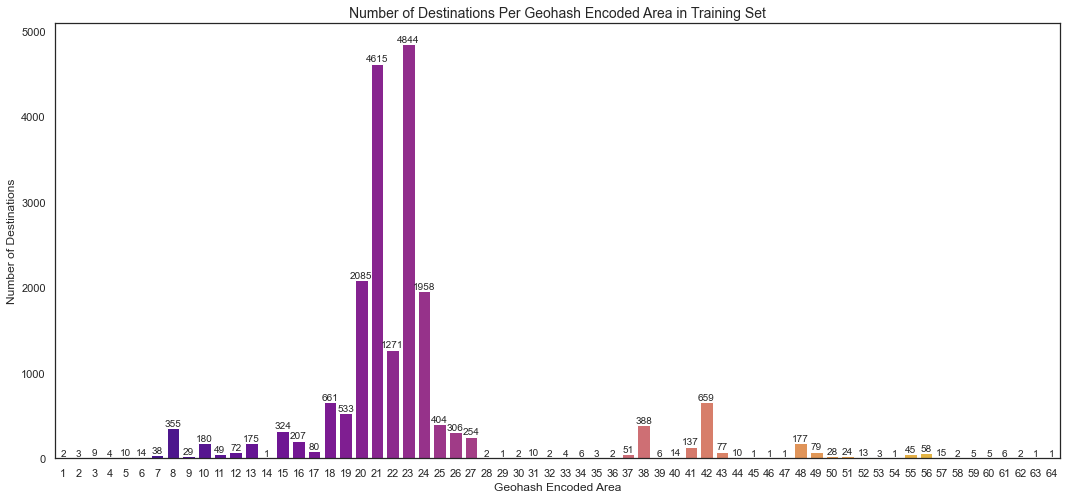

In [0]:
# Number of Destinations Per Geohash Encoded Area in Training Set
fig,axis = plt.subplots(figsize=(18, 8))
ax_geoP = sns.countplot(x='Destination (label)',data=train_data,palette='plasma')
plt.title('Number of Destinations Per Geohash Encoded Area in Training Set',fontsize=14)
plt.xlabel('Geohash Encoded Area')
plt.ylabel('Number of Destinations')
for p in ax_geoP.patches:
    ax_geoP.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=10, ha='center', va='bottom')
plt.show()

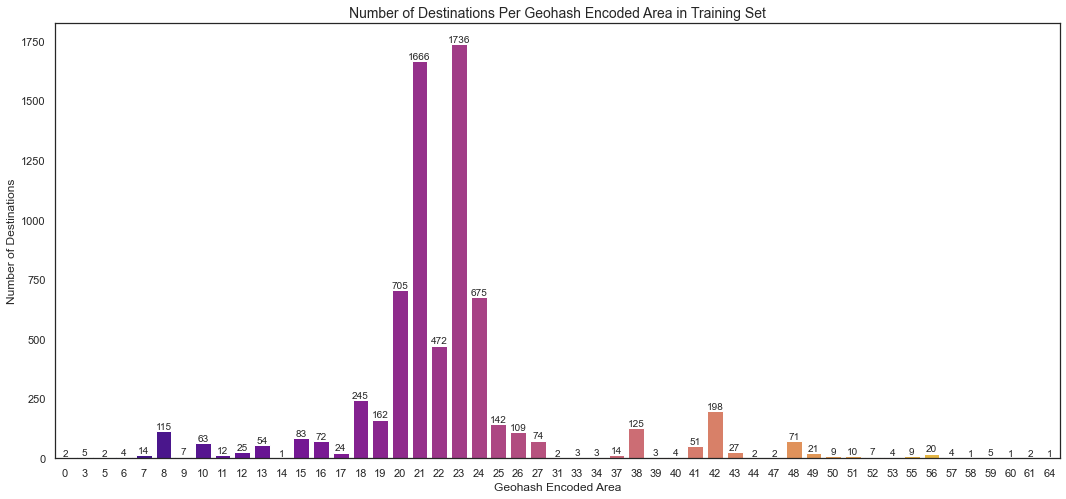

In [0]:
# Number of Destinations Per Geohash Encoded Area in Testing Set
fig,axis = plt.subplots(figsize=(18, 8))
ax_geoP = sns.countplot(x='Destination (label)',data=test_data,palette='plasma')
plt.title('Number of Destinations Per Geohash Encoded Area in Training Set',fontsize=14)
plt.xlabel('Geohash Encoded Area')
plt.ylabel('Number of Destinations')
for p in ax_geoP.patches:
    ax_geoP.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=10, ha='center', va='bottom')
plt.show()

"A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn't normal, applying a Box-Cox means that you are able to run a broader number of tests." 
- https://www.statisticshowto.com/box-cox-transformation/

"In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers." 
- https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [0]:
# Transform target variable and remove high zscores
train_data_t = train_data.copy()
train_data_t['transformed'] = boxcox(train_data['Time from Pickup to Arrival'])[0]
train_data_t['zscore'] = zscore(train_data_t['transformed'])
train_data_t = train_data_t[train_data_t['zscore'].abs() < 3]
train_data_t = train_data_t.drop('zscore', axis=1)
print(str(len(train_data)-len(train_data_t)) + " additional outliers were removed")

73 additional outliers were removed


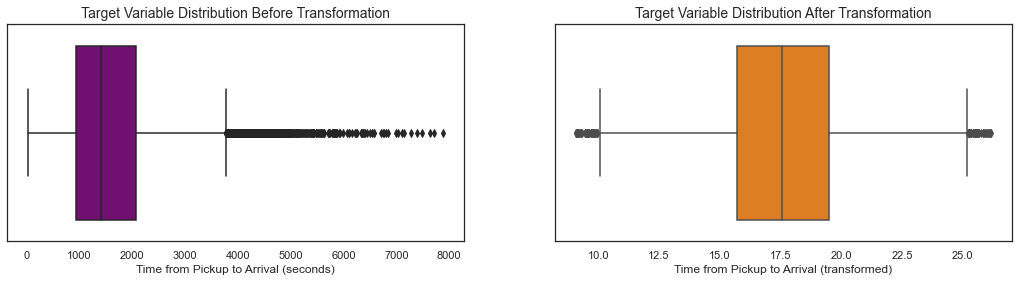

In [0]:
# Distribution of Distance from Pickup to Destination
fig,axis = plt.subplots(ncols=2, figsize=(18, 4))

# Before
sns.boxplot(x=train_data['Time from Pickup to Arrival'],color='purple',ax=axis[0])
axis[0].set_title('Target Variable Distribution Before Transformation',fontsize=14)
axis[0].set_xlabel('Time from Pickup to Arrival (seconds)')
# After
sns.boxplot(x=train_data_t['transformed'],color='#fb7d07',ax=axis[1])
axis[1].set_title('Target Variable Distribution After Transformation',fontsize=14)
axis[1].set_xlabel('Time from Pickup to Arrival (transformed)')

plt.show()

### Encoding Categorical Data

Since Platform Type represent categorical variables, then we change the data in the Platform Type column from integer to strings so that we can be able to encode them and not have our model interpret them as numerical data. We also check the number of unique categorical variables in each column.





In [0]:
# Change 'Platform Type' data type
train_data_t['Platform Type'] = train_data_t['Platform Type'].astype(str)

# Check how many unique items are in each column of indepedent variables
for col_name in train_data_t.columns:
    if train_data_t[col_name].dtypes=='object':
        unique_out = len(train_data_t[col_name].unique())
        print(f"Feature '{col_name}' has {unique_out} unique catergories")

Feature 'Order No' has 20252 unique catergories
Feature 'User Id' has 3169 unique catergories
Feature 'Vehicle Type' has 1 unique catergories
Feature 'Platform Type' has 4 unique catergories
Feature 'Personal or Business' has 2 unique catergories
Feature 'Placement - Time' has 15182 unique catergories
Feature 'Confirmation - Time' has 15220 unique catergories
Feature 'Arrival at Pickup - Time' has 15231 unique catergories
Feature 'Arrival at Destination - Time' has 15182 unique catergories
Feature 'Rider Id' has 921 unique catergories
Feature 'Placement - Time(bins)' has 17 unique catergories
Feature 'Pickup (geohash)' has 45 unique catergories
Feature 'Destination (geohash)' has 64 unique catergories


In [0]:
# Change 'Platform Type' data type
test_data['Platform Type'] = test_data['Platform Type'].astype(str)

# Check how many unique items are in each column of indepedent variables
for col_name in test_data.columns:
    if test_data[col_name].dtypes=='object':
        unique_out = len(test_data[col_name].unique())
        print(f"Feature '{col_name}' has {unique_out} unique catergories")

Feature 'Order No' has 7068 unique catergories
Feature 'User Id' has 1617 unique catergories
Feature 'Vehicle Type' has 1 unique catergories
Feature 'Platform Type' has 4 unique catergories
Feature 'Personal or Business' has 2 unique catergories
Feature 'Placement - Time' has 6336 unique catergories
Feature 'Confirmation - Time' has 6388 unique catergories
Feature 'Arrival at Pickup - Time' has 6374 unique catergories
Feature 'Rider Id' has 822 unique catergories
Feature 'Pickup (geohash)' has 38 unique catergories
Feature 'Destination (geohash)' has 52 unique catergories


In [0]:
all_features = ['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday', 'Arrival at Destination - Time',
       'Distance (KM)', 'Temperature', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id', 'No of Orders',
       'Age', 'Average Rating', 'No of Ratings', 'Placement - Time(bins)',
       'Delivery Rate', 'Scaled Rating', 'Pickup - Day of Month (sin)',
       'Pickup - Day of Month (cos)', 'Pickup - Weekday (sin)',
       'Pickup - Weekday (cos)', 'Pickup - Time (sin)', 'Pickup - Time (cos)',
       'Pickup (geohash)', 'Destination (geohash)', 'Pickup (label)',
       'Destination (label)', 'Time from Pickup to Arrival']
model_features = ['Platform Type','Personal or Business',
       'Pickup - Day of Month', 'Pickup - Weekday', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'No of Orders',
       'Age', 'Average Rating', 'No of Ratings', 'Delivery Rate', 'Scaled Rating', 
       'Pickup - Day of Month (sin)', 'Pickup - Day of Month (cos)',
       'Pickup - Weekday (sin)', 'Pickup - Weekday (cos)', 'Pickup - Time (sin)', 
       'Pickup - Time (cos)', 'Pickup (label)', 'Destination (label)', 
       'Time from Pickup to Arrival']

In [0]:
# Drop unnecessary columns
train = train_data_t[model_features]
test = test_data[model_features[:-1]]

# Rearrange columns
train['Time from Pickup to Arrival'] = train.pop('Time from Pickup to Arrival')
train.head()

,Platform Type,Personal or Business,Pickup - Day of Month,Pickup - Weekday,Pickup - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,...,Scaled Rating,Pickup - Day of Month (sin),Pickup - Day of Month (cos),Pickup - Weekday (sin),Pickup - Weekday (cos),Pickup - Time (sin),Pickup - Time (cos),Pickup (label),Destination (label),Time from Pickup to Arrival
0,3,Business,9,5,37650.0,4,20.4,-1.317755,36.830370,-1.300406,...,0.001095,0.968077,-0.250653,-0.974928,-0.222521,0.392738,-0.919650,23,24,745
1,3,Personal,12,5,42249.0,16,26.4,-1.351453,36.899315,-1.295004,...,0.000136,0.651372,-0.758758,-0.974928,-0.222521,0.069104,-0.997609,18,21,1993
2,3,Business,30,2,46383.0,3,23.5,-1.308284,36.843419,-1.300921,...,0.000206,-0.201299,0.979530,0.974928,-0.222521,-0.229413,-0.973329,23,24,455
3,3,Business,15,5,34986.0,9,19.2,-1.281301,36.832396,-1.257147,...,0.000237,0.101168,-0.994869,-0.974928,-0.222521,0.562444,-0.826835,23,23,1341
4,1,Personal,13,1,36323.0,9,15.4,-1.266597,36.792118,-1.295041,...,0.001086,0.485302,-0.874347,0.781831,0.623490,0.479522,-0.877530,22,21,1214


In [0]:
test.head()

,Platform Type,Personal or Business,Pickup - Day of Month,Pickup - Weekday,Pickup - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,...,Delivery Rate,Scaled Rating,Pickup - Day of Month (sin),Pickup - Day of Month (cos),Pickup - Weekday (sin),Pickup - Weekday (cos),Pickup - Time (sin),Pickup - Time (cos),Pickup (label),Destination (label)
0,3,Business,27,3,61607.0,8,19.2,-1.333275,36.870815,-1.305249,...,0.290536,0.000329,-0.724793,0.688967,0.433884,-0.900969,-0.973162,-0.230121,18,21
1,3,Business,17,5,48337.0,5,23.3,-1.272639,36.794723,-1.277007,...,1.787546,0.000094,-0.299363,-0.954139,-0.974928,-0.222521,-0.364944,-0.931029,22,21
2,3,Business,27,4,43074.0,5,22.8,-1.290894,36.822971,-1.276574,...,1.810870,0.000127,-0.724793,0.688967,-0.433884,-0.900969,0.009163,-0.999958,20,24
3,3,Business,17,1,51412.0,5,24.5,-1.290503,36.809646,-1.303382,...,0.869643,0.000087,-0.299363,-0.954139,0.781831,0.623490,-0.562324,-0.826917,20,21
4,3,Business,11,2,42964.0,6,24.4,-1.281081,36.814423,-1.266467,...,4.250893,0.002059,0.790776,-0.612106,0.974928,-0.222521,0.017162,-0.999853,20,23


We separate independent variables that are to be processed from the dependent variable(observation) by creating matrix of features. We encode categorical variables to numerical so that we can fit and evaluate the model.

In [0]:
# Create matrix of features
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
X_test = test.iloc[:,:].values

# Encode categorical data
label = LabelEncoder()
# Training set
X[:,1] = LabelEncoder().fit_transform(X[:,1]) #Customer Type
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough') #Platform Type
X = np.array(ct.fit_transform(X))
# Testing set
X_test[:,1] = LabelEncoder().fit_transform(X_test[:,1]) #Customer Type
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough') #Platform Type
X_test = np.array(ct.fit_transform(X_test))

# Drop last Platform Type dummy variable
X = np.delete(X,3,axis=1)
X_test = np.delete(X_test,3,axis=1)

pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0,0,1,0,9,5,37650,4,20.4,-1.31775,...,1.25057,0.00109523,0.968077,-0.250653,-0.974928,-0.222521,0.392738,-0.91965,23,24
1,0,0,1,1,12,5,42249,16,26.4,-1.35145,...,1.16814,0.000135657,0.651372,-0.758758,-0.974928,-0.222521,0.0691036,-0.997609,18,21
2,0,0,1,0,30,2,46383,3,23.5,-1.30828,...,4.22727,0.000206001,-0.201299,0.97953,0.974928,-0.222521,-0.229413,-0.973329,23,24
3,0,0,1,0,15,5,34986,9,19.2,-1.2813,...,3.13074,0.000236865,0.101168,-0.994869,-0.974928,-0.222521,0.562444,-0.826835,23,23
4,1,0,0,1,13,1,36323,9,15.4,-1.2666,...,2.65023,0.00108643,0.485302,-0.874347,0.781831,0.62349,0.479522,-0.87753,22,21


### Split Training Set Into Training and Validation Sets

We split the data into train,test and validation data

*   Train_data - data that contains a known output and the model learns on this data in order to be able to generalize other data later on.
*   Test_data - this data is used to assess how well the algorithm was trained with the training data
*   Validation data - this data provides an unbiased evaluation of a model fit on the train data while tuning the model's hyperparameters





In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train:", X_train[0,0:11], "... Training")
print("y_train:", y_train[0])
print("X_val:", X_val[0,0:11], "... Validation")
print("y_val:", y_val[0])
print("X_test:", X_test[0,0:11], "... Testing")

X_train: [1.0 0.0 0.0 1 11 5 40578.0 6 20.9 -1.2921983 36.7965431] ... Training
y_train: 1248
X_val: [0.0 0.0 1.0 1 24 1 54801.0 2 25.4 -1.26836 36.809632] ... Validation
y_val: 699
X_test: [0.0 0.0 1.0 0 27 3 61607.0 8 19.2 -1.3332749 36.870814700000004] ... Testing


### Feature Scaling

In [0]:
# Make new copies for scaling
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

# Apply scaler to numeric features
sc = StandardScaler()
X_train_scaled[:,4:] = sc.fit_transform(X_train[:,4:])
X_val_scaled[:,4:] = sc.transform(X_val[:,4:])
X_test_scaled[:,4:] = sc.transform(X_test[:,4:])

print("X_train_scaled:", X_train_scaled[0,0:6], "... Training")
print("X_val_scaled:", X_val_scaled[0,0:6], "... Validation")
print("X_test_scaled:", X_test_scaled[0,0:6], "... Testing")

X_train_scaled: [1.0 0.0 0.0 1 -0.5279663120656768 1.1173135783072954] ... Training
X_val_scaled: [0.0 0.0 1.0 1 0.9470435554590739 -1.4338240838950147] ... Validation
X_test_scaled: [0.0 0.0 1.0 0 1.2874304479647856 -0.15825525279385963] ... Testing


### Feature Selection

In [0]:
# Convert to dataframes
columns = ['Platform Type 1', 'Platform Type 2','Platform Type 3','Personal or Business', 'Pickup - Day of Month',
       'Pickup - Weekday', 'Pickup - Time', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'No of Orders', 'Age', 'Average Rating', 'No of Ratings',
       'Delivery Rate', 'Scaled Rating', 'Pickup - Day of Month (sin)',
       'Pickup - Day of Month (cos)', 'Pickup - Weekday (sin)',
       'Pickup - Weekday (cos)', 'Pickup - Time (sin)', 'Pickup - Time (cos)',
       'Pickup (label)', 'Destination (label)']
# Not scaled
X_train_df = pd.DataFrame(X_train,columns=columns)
X_val_df = pd.DataFrame(X_val,columns=columns)
X_test_df = pd.DataFrame(X_test,columns=columns)
# Scaled
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled,columns=columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=columns)
# Convert to numeric
X_train_scaled_df = X_train_scaled_df.apply(pd.to_numeric)
X_val_scaled_df = X_val_scaled_df.apply(pd.to_numeric)
X_test_scaled_df = X_test_scaled_df.apply(pd.to_numeric)
X_train_df = X_train_df.apply(pd.to_numeric)
X_val_df = X_val_df.apply(pd.to_numeric)
X_test_df = X_test_df.apply(pd.to_numeric)

X_train_scaled_df.head()

,Platform Type 1,Platform Type 2,Platform Type 3,Personal or Business,Pickup - Day of Month,Pickup - Weekday,Pickup - Time,Distance (KM),Temperature,Pickup Lat,...,Delivery Rate,Scaled Rating,Pickup - Day of Month (sin),Pickup - Day of Month (cos),Pickup - Weekday (sin),Pickup - Weekday (cos),Pickup - Time (sin),Pickup - Time (cos),Pickup (label),Destination (label)
0,1.0,0.0,0.0,1,-0.527966,1.117314,-0.821281,-0.641423,-0.688894,-0.354748,...,-1.285071,-0.560590,1.047015,-0.854165,-1.402471,0.079538,0.867378,-0.805754,-0.356289,-0.011075
1,0.0,0.0,1.0,0,-0.301042,-1.433824,-0.714119,-0.818251,0.023979,0.658249,...,0.668179,2.191464,0.617998,-1.228499,0.928760,1.504190,0.734972,-0.843903,0.135698,-0.148248
2,0.0,0.0,1.0,0,1.287430,-1.433824,1.868623,-0.110937,0.053682,-1.242814,...,-1.383361,-0.821731,-1.081498,1.003045,0.928760,1.504190,-1.373965,2.686474,-1.094268,-0.011075
3,0.0,0.0,1.0,1,-1.095278,1.117314,-0.553375,0.773206,-0.896816,1.893758,...,-1.212015,-0.580415,1.253434,0.515342,-1.402471,0.079538,0.534444,-0.868404,2.103644,-0.285422
4,0.0,0.0,1.0,0,-1.208740,-0.796040,0.744186,0.242721,1.212102,1.727984,...,0.224921,-0.703573,1.128288,0.774650,1.185000,0.079538,-0.903627,0.307625,2.841623,-0.285422


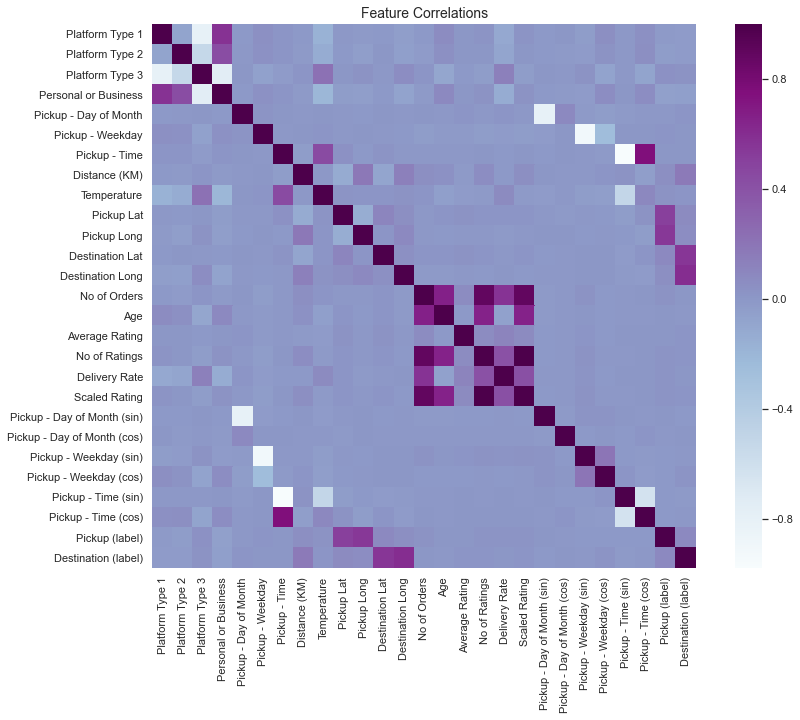

In [0]:
X_train_scaled_df['Time from Pickup to Arrival'] = y_train

fig,axis = plt.subplots(figsize=(14, 10))
sns.heatmap(X_train_df.corr(), square=True, cmap='BuPu')
plt.title('Feature Correlations',fontsize=14)
plt.show()

In [0]:
#Fitting the model using statsmodels.OLS
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dfm = X_train_scaled_df.copy()

# The dependent variable:
y_name = 'Time from Pickup to Arrival'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = "dfm['" + y_name + "']" + " ~ "+" + ".join("dfm['{0}']".format(x) for x in X_names);

# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                                    OLS Regression Results                                    
Dep. Variable:     dfm['Time from Pickup to Arrival']   R-squared:                       0.364
Model:                                            OLS   Adj. R-squared:                  0.363
Method:                                 Least Squares   F-statistic:                     342.6
Date:                                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                                        12:30:31   Log-Likelihood:            -1.3018e+05
No. Observations:                               16201   AIC:                         2.604e+05
Df Residuals:                                   16173   BIC:                         2.606e+05
Df Model:                                          27                                         
Covariance Type:                            nonrobust                                         
                                         coef    s

In [0]:
#Variable Selection by Correlation and Significance
corrs = X_train_scaled_df.corr()['Time from Pickup to Arrival'].sort_values(ascending=False)

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}
column_titles = [col for col in corrs.index if col!= 'Time from Pickup to Arrival']
for col in column_titles:
    p_val = round(pearsonr(X_train_scaled_df[col], X_train_scaled_df['Time from Pickup to Arrival'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted

,Correlation_Coefficient,P_Value
Distance (KM),0.591575,0.000000
Average Rating,-0.063291,0.000000
Destination Lat,-0.068999,0.000000
Pickup Lat,-0.073159,0.000000
Destination (label),0.063214,0.000000
Destination Long,0.069444,0.000000
Pickup Long,0.078493,0.000000
Pickup - Weekday (cos),-0.034290,0.000013
Pickup - Time (sin),-0.032669,0.000032
Temperature,0.029896,0.000141


In [0]:
# from sklearn.preprocessing import MinMaxScaler
# columns = ['Platform Type 1', 'Platform Type 2','Platform Type 3','Personal or Business', 'Pickup - Day of Month',
#        'Pickup - Weekday', 'Pickup - Time', 'Distance (KM)', 'Temperature',
#        'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
#        'No of Orders', 'Age', 'Average Rating', 'No of Ratings',
#        'Delivery Rate', 'Scaled Rating', 'Pickup - Day of Month (sin)',
#        'Pickup - Day of Month (cos)', 'Pickup - Weekday (sin)',
#        'Pickup - Weekday (cos)', 'Pickup - Time (sin)', 'Pickup - Time (cos)',
#        'Pickup (label)', 'Destination (label)']
# # Make new copies for scaling
# X_train_scaled = X_train.copy()
# X_val_scaled = X_val.copy()
# X_test_scaled = X_test.copy()
# # Apply scaler to numeric features
# sc = MinMaxScaler()
# X_train_scaled[:,4:] = sc.fit_transform(X_train[:,4:])
# X_val_scaled[:,4:] = sc.transform(X_val[:,4:])
# X_test_scaled[:,4:] = sc.transform(X_test[:,4:])
# X_normalize = pd.DataFrame(X_train_scaled, columns=columns)

# from sklearn.feature_selection import VarianceThreshold

# # Create VarianceThreshold object
# selector = VarianceThreshold(threshold=0.03)

# # Use the object to apply the threshold on data
# selector.fit(X_normalize)

# # Get column variances
# column_variances = selector.variances_

# vars_dict = {}
# vars_dict = [{"Variable_Name": c_name, "Variance": round(c_var,2)}
#              for c_name, c_var in zip(X_normalize.columns, column_variances)]
# df_vars = pd.DataFrame(vars_dict)
# df_vars.sort_values(by='Variance', ascending=False)

In [0]:
# selector_1 = VarianceThreshold(threshold=0.05)
# selector_2 = VarianceThreshold(threshold=0.1)
# selector_3 = VarianceThreshold(threshold=0.15)
# selector_1.fit(X_normalize)
# selector_2.fit(X_normalize)
# selector_3.fit(X_normalize)
# X_1 = X_normalize[X_normalize.columns[selector_1.get_support(indices=True)]]
# X_2 = X_normalize[X_normalize.columns[selector_2.get_support(indices=True)]]
# X_3 = X_normalize[X_normalize.columns[selector_3.get_support(indices=True)]]
# # Create figure and axes
# f, ax = plt.subplots(figsize=(8, 3), nrows=1, ncols=1)

# # Create list of titles and predictions to use in for loop
# subset_preds = [X_1.shape[1], X_2.shape[1], X_3.shape[1]]
# thresholds = ['0.05', '0.1', '0.15']

# # Plot graph
# ax.set_title('# of Predictors vs Thresholds')
# ax.set_ylabel('# of Predictors')
# ax.set_xlabel('Threshold')
# sns.barplot(x=thresholds, y=subset_preds)
# plt.show()

In [0]:
# # Find rows and columns where correlation coefficients > 0.9 or <-0.9
# corr = X_train_scaled_df.corr()
# r, c = np.where(np.abs(corr) > 0.9)

# # We are only interested in the off diagonal entries:
# off_diagonal = np.where(r != c)

# # Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
# corr.iloc[r[off_diagonal], c[off_diagonal]]

In [0]:
# # Model building - Independent Variable (IV) DataFrame
# X_train_scaled_df = X_train_scaled_df.drop('Time from Pickup to Arrival',axis=1)
# X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
# X_train_scaled_df = X_train_scaled_df[X_names]
# X_val_scaled_df = X_val_scaled_df[X_names]
# X_test_scaled_df = X_test_scaled_df[X_names]

# # Create the correlation matrix
# corr = X_data.corr()

# # Find rows and columnd where correlation coefficients > 0.9 or <-0.9
# corr[np.abs(corr) > 0.8]

In [0]:
#Convert back to arrays
# X_train_scaled = X_train_scaled_df.values
# X_val_scaled = X_val_scaled_df.values
# X_test_scaled = X_test_scaled_df.values

<a id="modelling"></a>
## 6. Modelling

Ignore these three cells:

In [0]:
all_columns = ['Platform Type 1', 'Platform Type 2','Platform Type 3','Personal or Business',
       'Pickup - Day of Month', 'Pickup - Weekday', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'No of Orders',
       'Age', 'Average Rating', 'No of Ratings', 'Delivery Rate', 'Scaled Rating', 
       'Pickup - Day of Month (sin)', 'Pickup - Day of Month (cos)',
       'Pickup - Weekday (sin)', 'Pickup - Weekday (cos)', 'Pickup - Time (sin)', 
       'Pickup - Time (cos)', 'Pickup (label)', 'Destination (label)']

In [0]:
# Scaled
columns = ['Platform Type 1', 'Platform Type 2','Platform Type 3','Personal or Business',
       'Pickup - Day of Month', 'Pickup - Weekday', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'No of Orders',
       'Age', 'Average Rating', 'No of Ratings', 'Delivery Rate', 'Scaled Rating', 
       'Pickup - Day of Month (sin)', 'Pickup - Day of Month (cos)',
       'Pickup - Weekday (sin)', 'Pickup - Weekday (cos)', 'Pickup - Time (sin)', 
       'Pickup - Time (cos)', 'Pickup (label)', 'Destination (label)']
X_train_scaled1 = pd.DataFrame(X_train_scaled_df.loc[:,columns],columns=columns).values
X_val_scaled1 = pd.DataFrame(X_val_scaled_df.loc[:,columns],columns=columns).values

In [0]:
# Not scaled
columns = ['Platform Type 1', 'Platform Type 2','Platform Type 3','Personal or Business',
       'Pickup - Day of Month', 'Pickup - Weekday', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'No of Orders',
       'Age', 'Average Rating', 'No of Ratings', 'Delivery Rate', 'Scaled Rating', 
       'Pickup - Day of Month (sin)', 'Pickup - Day of Month (cos)',
       'Pickup - Weekday (sin)', 'Pickup - Weekday (cos)', 'Pickup - Time (sin)', 
       'Pickup - Time (cos)', 'Pickup (label)', 'Destination (label)']
X_train1 = pd.DataFrame(X_train_df.loc[:,columns],columns=columns).values
X_val1 = pd.DataFrame(X_val_df.loc[:,columns],columns=columns).values

### Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
# Distance (KM) has the highest correlation to our target
lm = LinearRegression()
lm.fit(X_train[:,7].reshape(-1, 1), y_train)
gen_y_test = lm.predict(X_val[:,7].reshape(-1, 1))
lm_rmse = sqrt(metrics.mean_squared_error(y_val, gen_y_test))
lm_r2 = metrics.r2_score(y_val, gen_y_test)

In [0]:
print("Testing: Linear Regression")
print('RMSE:', lm_rmse)
print('R-squared:', lm_r2)

Testing: Linear Regression
RMSE: 737.073533875853
R-squared: 0.3887524770507498


### Multiple Linear Regression

In [0]:
regressor = LinearRegression()
ml = regressor.fit(X_train_scaled, y_train)
gen_y_test = regressor.predict(X_val_scaled)
ml_rmse = sqrt(metrics.mean_squared_error(y_val, gen_y_test))
ml_r2 = metrics.r2_score(y_val, gen_y_test)

In [0]:
print("Testing: Multiple Linear Regression")
print('RMSE:', ml_rmse)
print('R-squared:', ml_r2)

Testing: Multiple Linear Regression
RMSE: 729.3470338497187
R-squared: 0.4015003237273843


### Polynomial Regression

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
gen_y_test = regressor.predict(poly_reg.transform(X_val))
pl_rmse = sqrt(metrics.mean_squared_error(y_val, gen_y_test))
pl_r2 = metrics.r2_score(y_val, gen_y_test)

In [0]:
print("Testing: Polynomial Regression")
print('RMSE:', pl_rmse)
print('R-squared:', pl_r2)

Testing: Polynomial Regression
RMSE: 801.3312256618888
R-squared: 0.27753034558897605


### Support Vector Regression

In [0]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_scaled, y_train)
gen_y_test = regressor.predict(X_val_scaled)
sv_rmse = sqrt(metrics.mean_squared_error(y_val, gen_y_test))
sv_r2 = metrics.r2_score(y_val, gen_y_test)

In [0]:
print("Testing: Support Vector Regression")
print('RMSE:', sv_rmse)
print('R-squared:', sv_r2)

Testing: Support Vector Regression
RMSE: 894.9125345629151
R-squared: 0.09893388162372219


### Decision Tree Regression

In [0]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
gen_y_test = regressor.predict(X_val)
dt_rmse = sqrt(metrics.mean_squared_error(y_val, gen_y_test))
dt_r2 = metrics.r2_score(y_val, gen_y_test)

In [0]:
print("Testing: Decision Tree Regression")
print('RMSE:', dt_rmse)
print('R-squared:', dt_r2)

Testing: Decision Tree Regression
RMSE: 1048.0428547894362
R-squared: -0.23581527970587746


### Random Forest Regression

In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 150, random_state = 0)
regressor.fit(X_train, y_train)
gen_y_test = regressor.predict(X_val)
rf_rmse = sqrt(metrics.mean_squared_error(y_val, gen_y_test))
rf_r2 = metrics.r2_score(y_val, gen_y_test)

In [0]:
print("Testing: Random Forest Regression")
print('RMSE:', rf_rmse)
print('R-squared:', rf_r2)

Testing: Random Forest Regression
RMSE: 715.3933504943324
R-squared: 0.42418194809750165


### Lasso Regression

In [0]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha =0.01)
lasso.fit(X_train_scaled, y_train)
gen_y_test=lasso.predict(X_val_scaled)
ls_rmse = sqrt(metrics.mean_squared_error(y_val, gen_y_test))
ls_r2 = metrics.r2_score(y_val, gen_y_test)

In [0]:
print("Testing: Lasso Regression")
print('RMSE:', ls_rmse)
print('R-squared:', ls_r2)

Testing: Lasso Regression
RMSE: 729.3326769228288
R-squared: 0.40152388598547506


### Ridge Regression

In [0]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha =0.01)
ridge.fit(X_train_scaled, y_train)
gen_y_test=ridge.predict(X_val_scaled)
rd_rmse = sqrt(metrics.mean_squared_error(y_val, gen_y_test))
rd_r2 = metrics.r2_score(y_val, gen_y_test)

In [0]:
print("Testing: Ridge Regression")
print('RMSE:', rd_rmse)
print('R-squared:', rd_r2)

Testing: Ridge Regression
RMSE: 729.3460448869265
R-squared: 0.40150194680523954


### XGBoost

In [0]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train_scaled,y_train)
gen_y_test = xg_reg.predict(X_val_scaled)
xg_rmse = sqrt(metrics.mean_squared_error(y_val, gen_y_test))
xg_r2 = metrics.r2_score(y_val, gen_y_test)

In [0]:
print("Testing: XGBoost")
print('RMSE:', xg_rmse)
print('R-squared:', xg_r2)

Testing: XGBoost
RMSE: 709.9949417354632
R-squared: 0.43283948657724314


### LightGBM

In [0]:
import lightgbm as lgbm
lgbm_model = lgbm.LGBMRegressor()
lgbm_model.fit(X_train_scaled,y_train)
gen_y_test = lgbm_model.predict(X_val_scaled)
lgbm_rmse = sqrt(metrics.mean_squared_error(y_val, gen_y_test))
lgbm_r2 = metrics.r2_score(y_val, gen_y_test)

In [0]:
print("Testing: LightGBM")
print('RMSE:', lgbm_rmse)
print('R-squared:', lgbm_r2)

Testing: LightGBM
RMSE: 696.1859052566343
R-squared: 0.45468690029411074


<a id="evaluation"></a>
## 7. Performance Evaluation

### Compare Models on Performance Metrics

**Mean Squared Error:**  
$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$   
   
**R squared:**
$$R^2 = 1 - \frac{\sum(y_i-\hat{y}_i)^2}{\sum(y_i-\bar{y})^2}$$

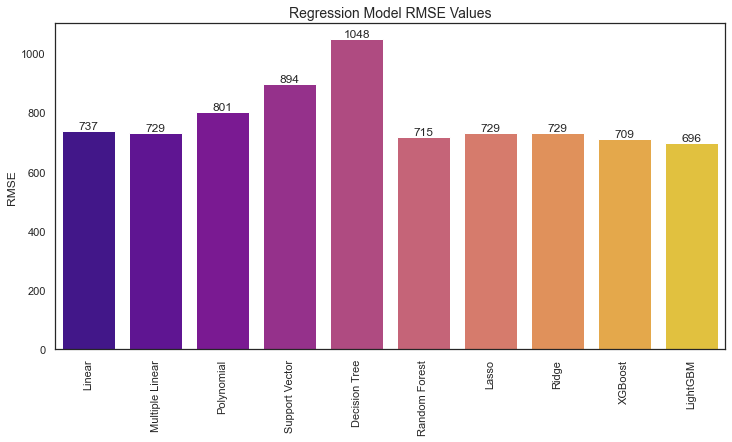

In [0]:
# Compare RMSE values between models
fig,axis = plt.subplots(figsize=(12, 6))
rmse_x = ['Linear','Multiple Linear','Polynomial','Support Vector','Decision Tree','Random Forest','Lasso','Ridge','XGBoost','LightGBM']
rmse_y = [lm_rmse,ml_rmse,pl_rmse,sv_rmse,dt_rmse,rf_rmse,ls_rmse,rd_rmse,xg_rmse,lgbm_rmse]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='plasma')
plt.title('Regression Model RMSE Values',fontsize=14)
plt.ylabel('RMSE')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')
plt.show()

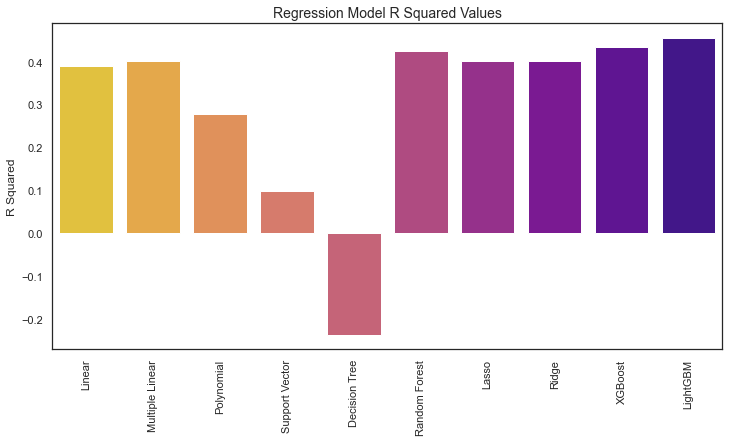

In [0]:
# Compare R squared values between models
fig,axis = plt.subplots(figsize=(12, 6))
rmse_x = ['Linear','Multiple Linear','Polynomial','Support Vector','Decision Tree','Random Forest','Lasso','Ridge','XGBoost','LightGBM']
rmse_y = [lm_r2,ml_r2,pl_r2,sv_r2,dt_r2,rf_r2,ls_r2,rd_r2,xg_r2,lgbm_r2]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='plasma_r')
plt.title('Regression Model R Squared Values',fontsize=14)
plt.ylabel('R Squared')
plt.xticks(rotation=90)
plt.show()

### Hyperparameter Tuning on Best Models

In [0]:
# rs = 3
# kfold = KFold(n_splits=10, random_state=rs, shuffle=True)

# reg = [RandomForestRegressor(random_state=rs),xgb.XGBRegressor(random_state=rs, objective="reg:squarederror"),lgbm.LGBMRegressor(random_state=rs)]
# cv_results = []
# for regressor in regressors:
#     cv_results.append(np.sqrt(abs(cross_val_score(reg, X_train, y=y_train, scoring='neg_mean_squared_error', cv=kfold))))

# cv_means = []
# cv_stds = []
# for cv_result in cv_results:
#     cv_means.append(cv_result.mean())
#     cv_stds.append(cv_result.std())
    
# cv_res = pd.DataFrame({ 
#     "Algorithm": ["RFR", "XGBR", "LGBM"],
#     "CrossValMeans": cv_means, "CrossValErrors": cv_stds
#                        })
# cv_res = cv_res.sort_values("CrossValMeans", ascending=True)
# print(cv_res)

  Algorithm  CrossValMeans  CrossValErrors
2      LGBM     716.062512       19.748008
1      XGBR     735.869515       19.181726
0       RFR     740.088084       20.050621


In [0]:
# #xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

# params = {
#     'n_estimators':[50,100],
#     'num_leaves': [10,12],
#     'reg_alpha': [0.01,0.02],
#     'min_data_in_leaf': [250,300],
#     'learning_rate': [0.05],
#     'objective': ['regression']
#     }
# model = lgbm.LGBMRegressor(random_state=rs)
# lsearch = GridSearchCV(estimator = model, cv=kfold,scoring='neg_mean_squared_error', param_grid=params)
# result = lsearch.fit(X_train, y_train)

# l_params = result.best_params_
# l_score = np.sqrt(abs(result.best_score_))
# print(result.best_params_, np.sqrt(abs(result.best_score_)))

{'learning_rate': 0.05, 'min_data_in_leaf': 300, 'n_estimators': 100, 'num_leaves': 12, 'objective': 'regression', 'reg_alpha': 0.01} 726.4845936884633


In [0]:
#Find best model/parameters - NB: ADD DETAILS ON HOW WE GOT THE FINAL MODEL & PARAMETERS

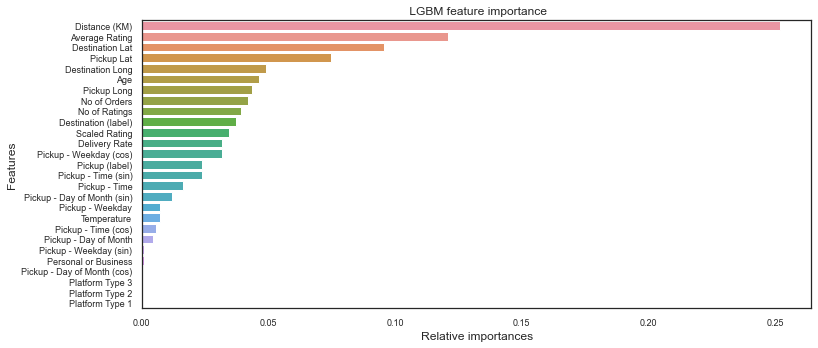

In [0]:
# from sklearn.model_selection import train_test_split, KFold, GridSearchCV 

# vals = result.best_estimator_.feature_importances_
# l_importance = np.array([ val/sum(vals) for val in vals ])
# #r_importance  = rf.best_estimator_.feature_importances_
# feats = np.array(columns)

# #fig,axes = plt.subplots(1,2, figsize=(12, 8))
# fig,axes = plt.subplots(figsize=(12, 10))
# plt.subplots_adjust(top=0.6, bottom=0.2, hspace=.6, wspace=0.8)

# indices = np.argsort(l_importance)[::-1]
# g = sns.barplot(y=feats[indices], x=l_importance[indices], orient='h')#, ax=axes[0])
# g.set_xlabel("Relative importances")
# g.set_ylabel("Features")
# g.tick_params(labelsize=9)
# g.set_title(" LGBM feature importance")

# # index = np.argsort(r_importance)[::-1]
# # g = sns.barplot(y=feats[index], x=r_importance[index], orient='h', ax=axes[1])
# # g.set_xlabel("Relative importances", fontsize=12)
# # g.set_ylabel("Features", fontsize=12)
# # g.tick_params(labelsize=9)
# # g.set_title(" Random Forest feature importance")
# plt.show()

<a id="analysis"></a>
## 8. Model Analysis

### Evaluate the best model on the training set

In [0]:
# # Create figure and axes
# f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# # Create list of titles and predictions to use in for loop
# train_pred = [lm.predict(X_train),
#               lm_corr.predict(X_corr_train),
#               lm_var.predict(X_var_train)]
# test_pred = [lm.predict(X_test),
#              lm_corr.predict(X_corr_test),
#              lm_var.predict(X_var_test)]
# title = ['No threshold', 'Corr threshold', 'Var threshold']

# # Key:
# # No threshold - linear regression with all predictive variables
# # Corr threshold - linear regression with correlation thresholded predictive variables
# # Var threshold - linear regression with variance thresholded predictive variables


# # Loop through all axes to plot each model's results
# for i in range(3):
#     test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
#     test_r2 = round(r2_score(test_pred[i], y_test), 4)
#     train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
#     train_r2 = round(r2_score(train_pred[i], y_train), 4)
#     title_str = f"Linear Regression({title[i]}) \n train MSE = {train_mse} \n " + \
#                 f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
#                 f"test $R^{2}$ = {test_r2}"
#     ax[i].set_title(title_str)
#     ax[i].set_xlabel('Actual')
#     ax[i].set_ylabel('Predicted')
#     ax[i].plot(y_test, y_test, 'r')
#     ax[i].scatter(y_test, test_pred[i])

### Interpret model results

<a id="conclusion"></a>
## 9. Conclusion

<a id="save"></a>
## 9. Save Model and Output

In [0]:
# # Make Zindi submission file
# y_test = model.predict(X_test, num_iteration=model.best_iteration)
# df_results = pd.DataFrame({"Order No":test_df['Order No'], 
#                            "Time from Pickup to Arrival": y_test })
# df_results.to_csv("Team19_JHB_submission.csv", index=False)

In [0]:
# # Save model
# model_save_path = "Team19_JHB_model.pkl"
# with open(model_save_path,'wb') as file:
#     pickle.dump(model,file)

[Back to top ↑](#top)

<sub>*Team name credit: Jono (& RuPaul)</sub>